In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_t=pd.read_csv('bf_train.csv')

In [3]:
data_t.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


***Product_Category_2 and Product_Category_3*** have null values in them.

In [5]:
data_t.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [6]:
data_t['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

- There are 5891 distinct users.
- Some users are frequent visitors, while some just stopped by.

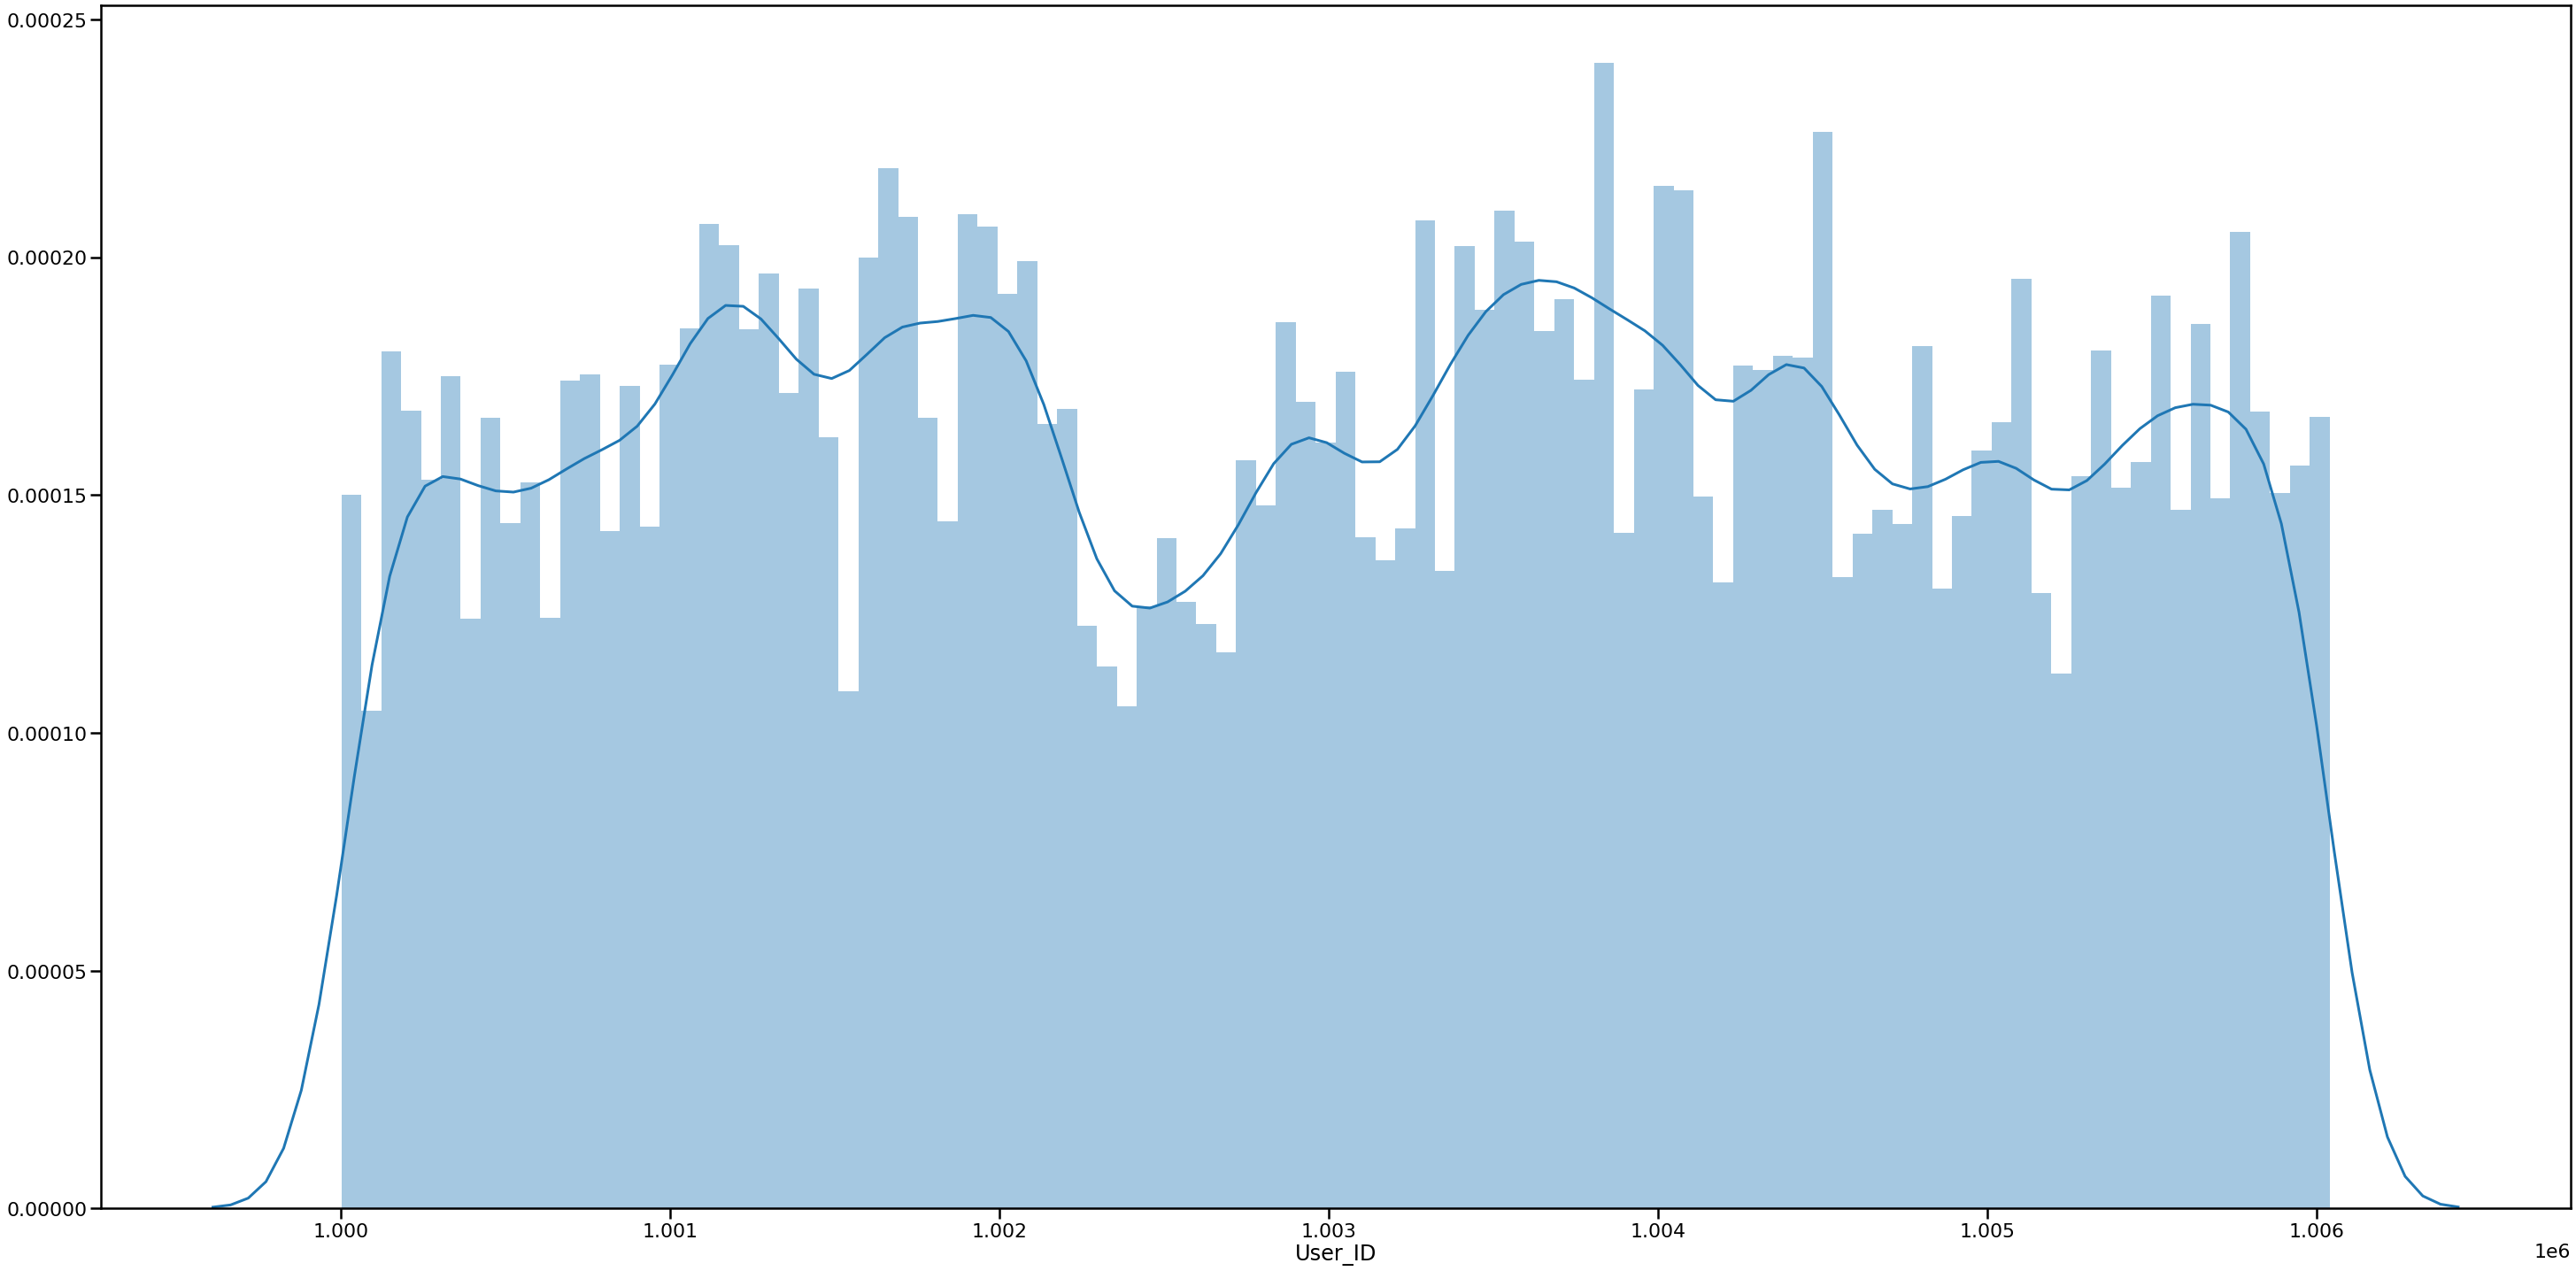

In [7]:
plt.figure(figsize=(50,25))
sns.set_context('poster')
sns.distplot(data_t['User_ID'],bins=100)

In [8]:
data_t['User_ID'].value_counts().describe()

count    5891.000000
mean       93.374300
std       107.190049
min         6.000000
25%        26.000000
50%        54.000000
75%       117.000000
max      1026.000000
Name: User_ID, dtype: float64

In [9]:
user_id=list(data_t['User_ID'].unique())

In [10]:
grouped_user=data_t.groupby('User_ID')

In [11]:
grouped_user.get_group(1000001).iloc[0:1]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [12]:
h=pd.DataFrame(columns=data_t.columns)

### Creating a DataFrame, containing users information:

In [13]:
for i in range(5891):
    h=pd.concat([h,grouped_user.get_group(user_id[i]).iloc[0:1]])

In [14]:
h.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [15]:
h.shape

(5891, 12)

In [16]:
h.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
185450,1004588,P00260042,F,26-35,4,C,0,0,5,8.0,NaN,8707
187076,1004871,P00242742,M,18-25,12,C,2,0,1,2.0,9.0,15389
221494,1004113,P00351842,M,36-45,17,C,3,0,5,NaN,NaN,5183
229480,1005391,P00339342,M,26-35,7,A,0,0,1,NaN,NaN,15831
243533,1001529,P00000242,M,18-25,4,C,4+,1,2,4.0,9.0,9888


In [17]:
users_data=h

In [18]:
users_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [19]:
users_data=users_data.drop(['Product_ID'],axis=1)

In [20]:
users_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [21]:
users_data=users_data.drop(['Product_Category_1','Product_Category_2','Product_Category_3'],axis=1)

In [22]:
users_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
4,1000002,M,55+,16,C,4+,0,7969
5,1000003,M,26-35,15,A,3,0,15227
6,1000004,M,46-50,7,B,2,1,19215
9,1000005,M,26-35,20,A,1,1,7871


- Now we have distinct users.
- Now we should gain insights about our customers.

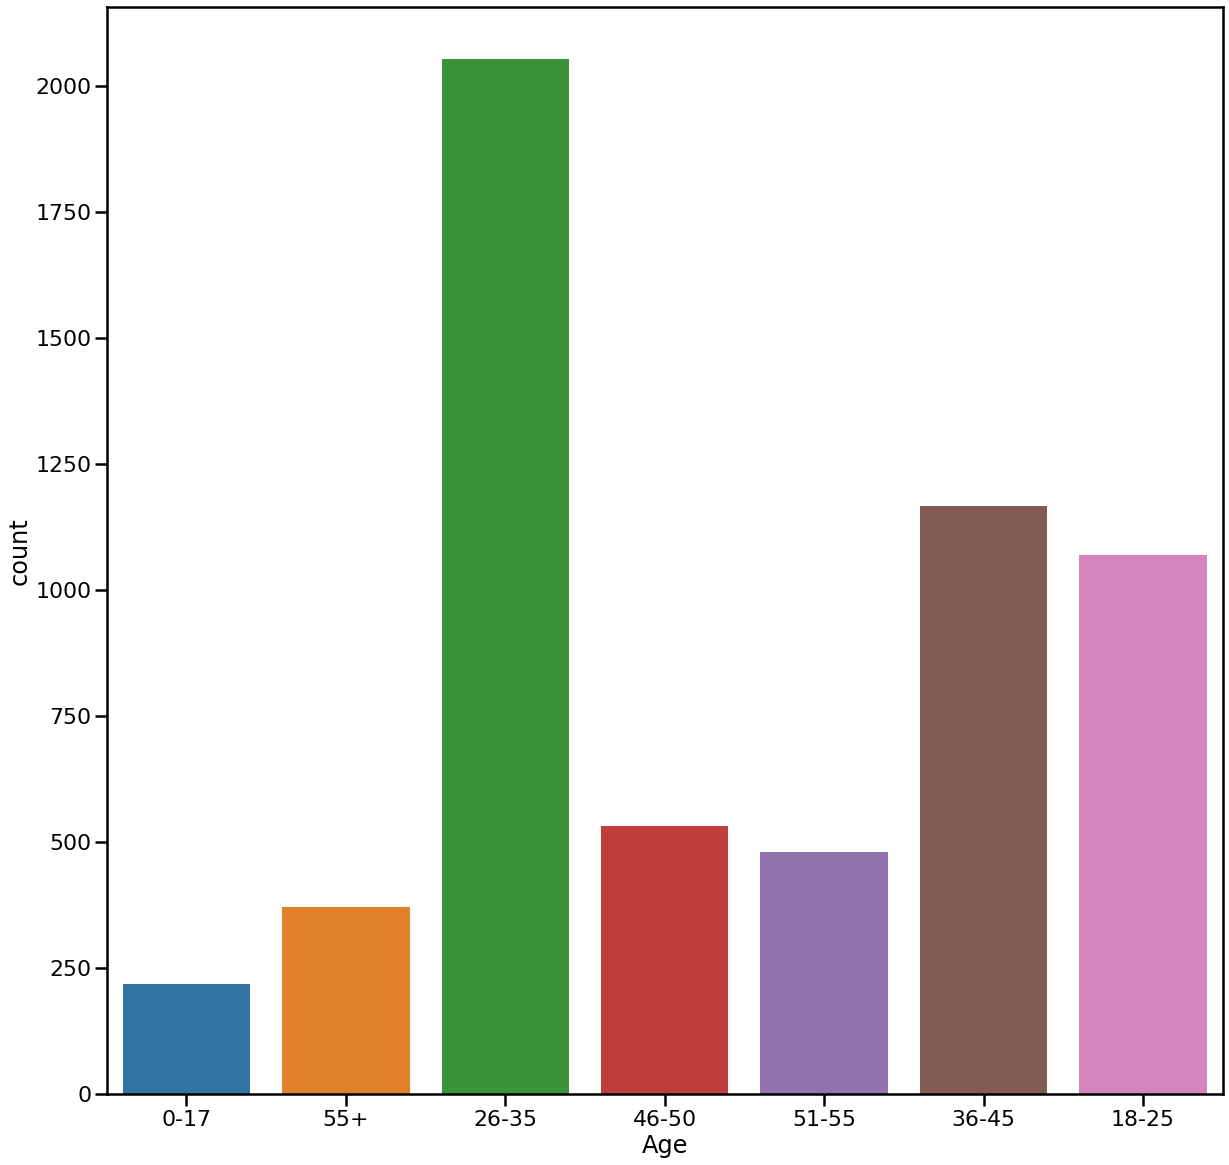

In [23]:
plt.figure(figsize=(20,20))
sns.set_context('poster')
sns.countplot(x='Age',data=users_data)
plt.show()

In [24]:
users_data['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

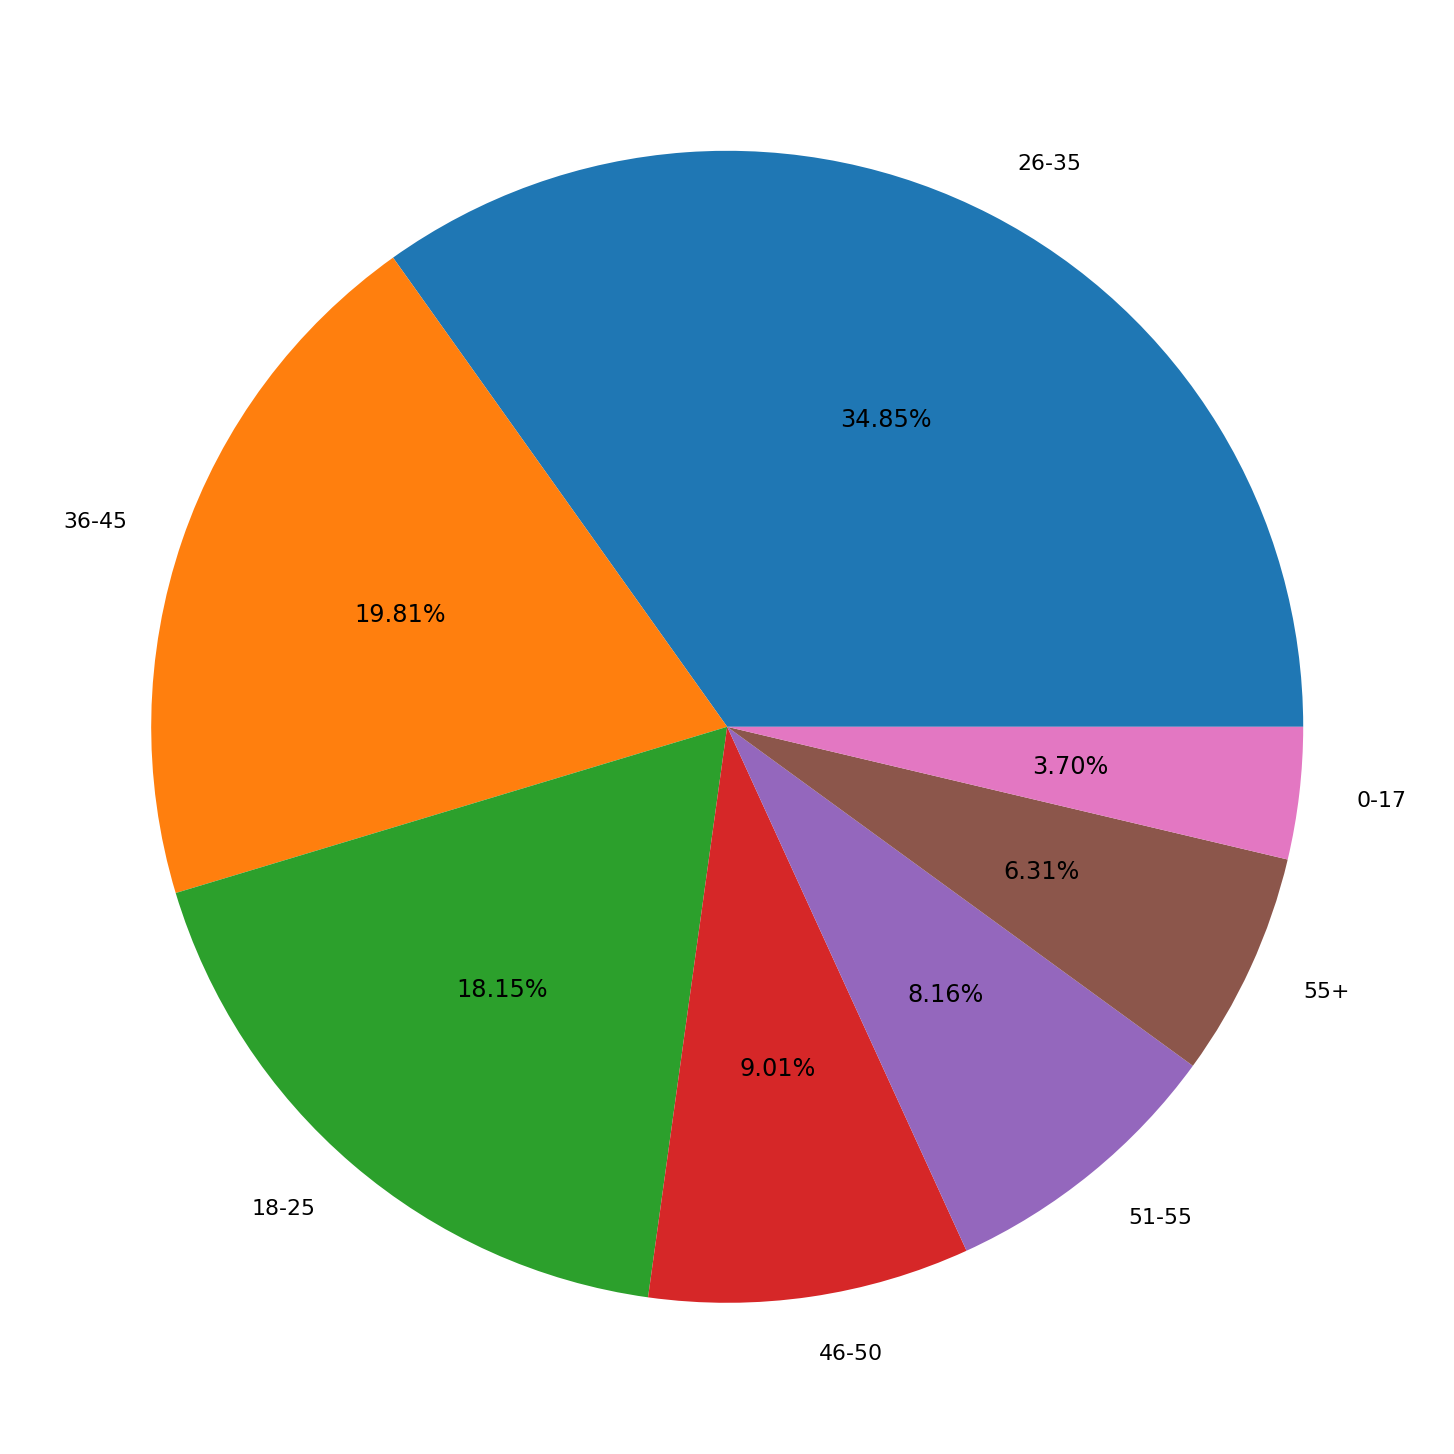

In [25]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['Age'].value_counts()), labels=list(users_data['Age'].value_counts().index), autopct='%1.2f%%')
plt.show()

In [26]:
labe=list(users_data['Age'].value_counts().index)


In [27]:
users_data['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [28]:
labe

['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

In [29]:
users_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
4,1000002,M,55+,16,C,4+,0,7969
5,1000003,M,26-35,15,A,3,0,15227
6,1000004,M,46-50,7,B,2,1,19215
9,1000005,M,26-35,20,A,1,1,7871


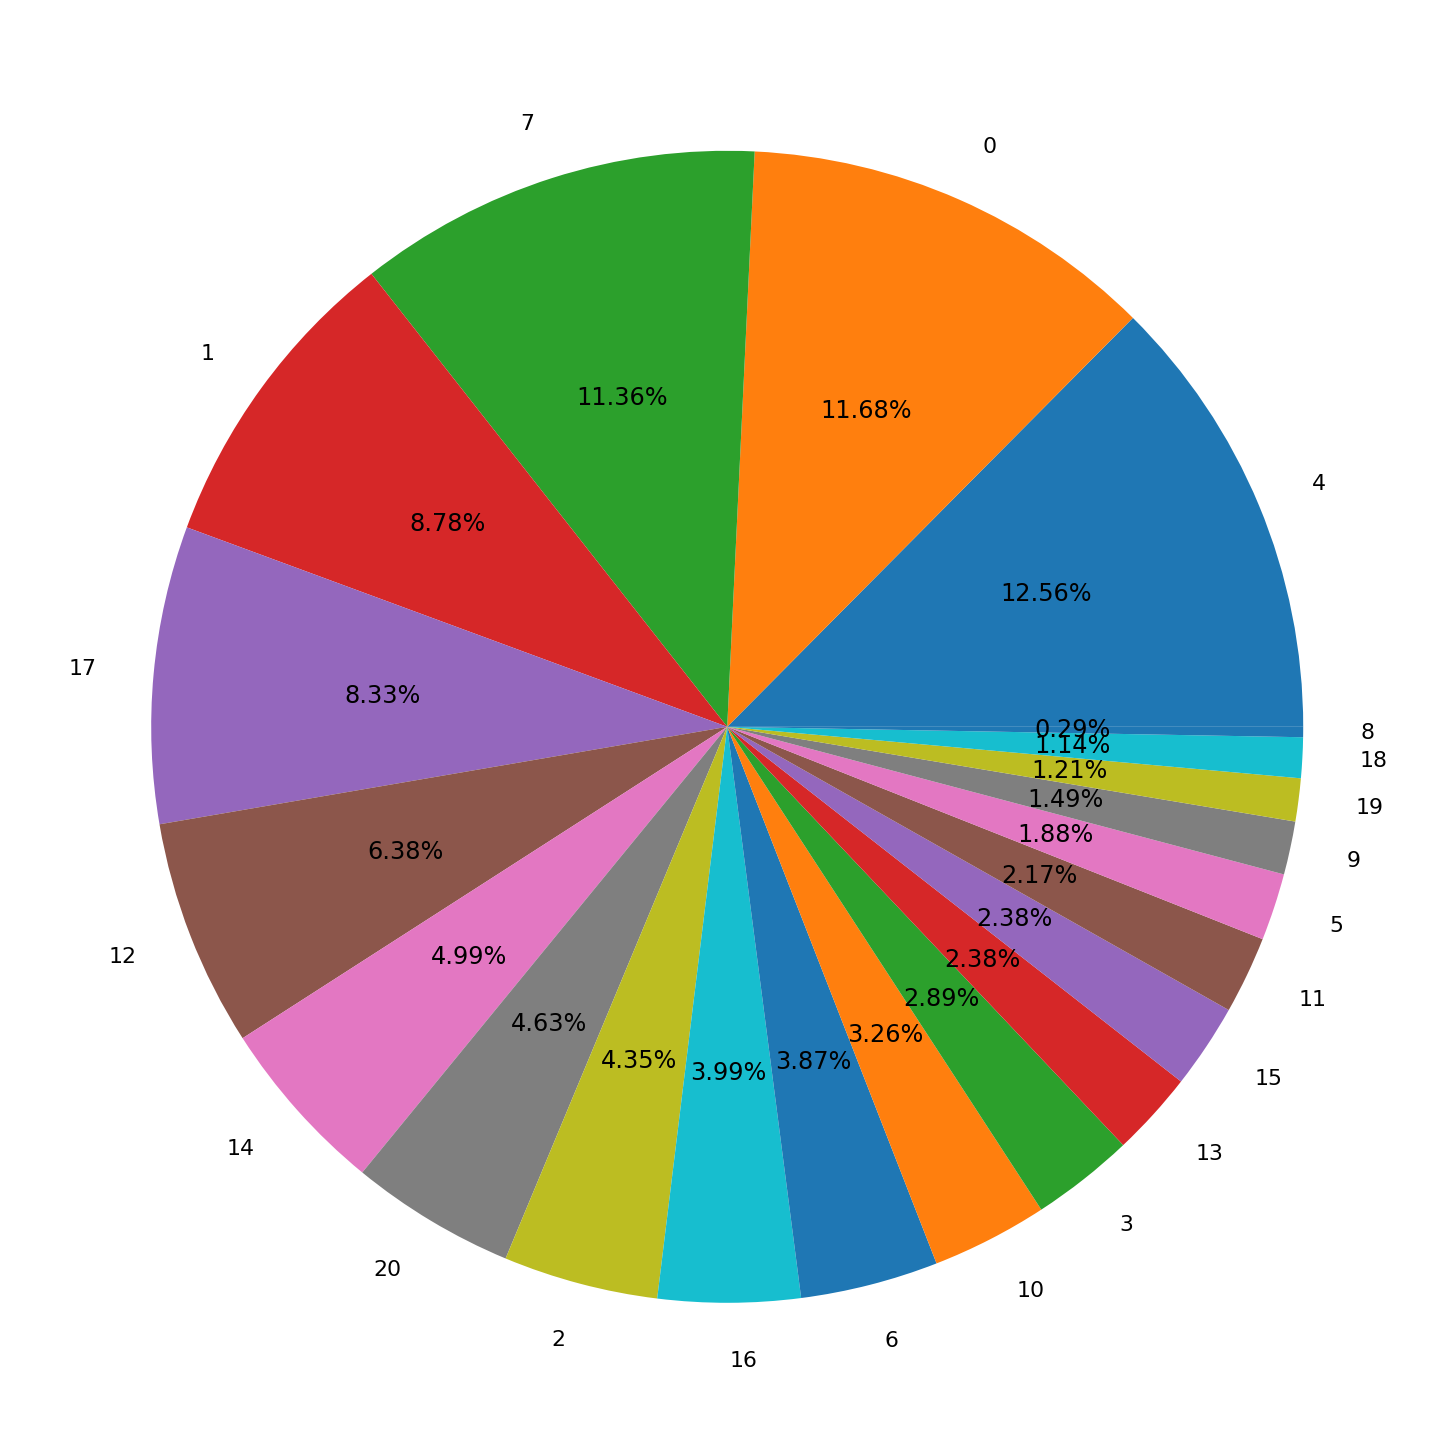

In [30]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['Occupation'].value_counts()), labels=list(users_data['Occupation'].value_counts().index), autopct='%1.2f%%')
plt.show()

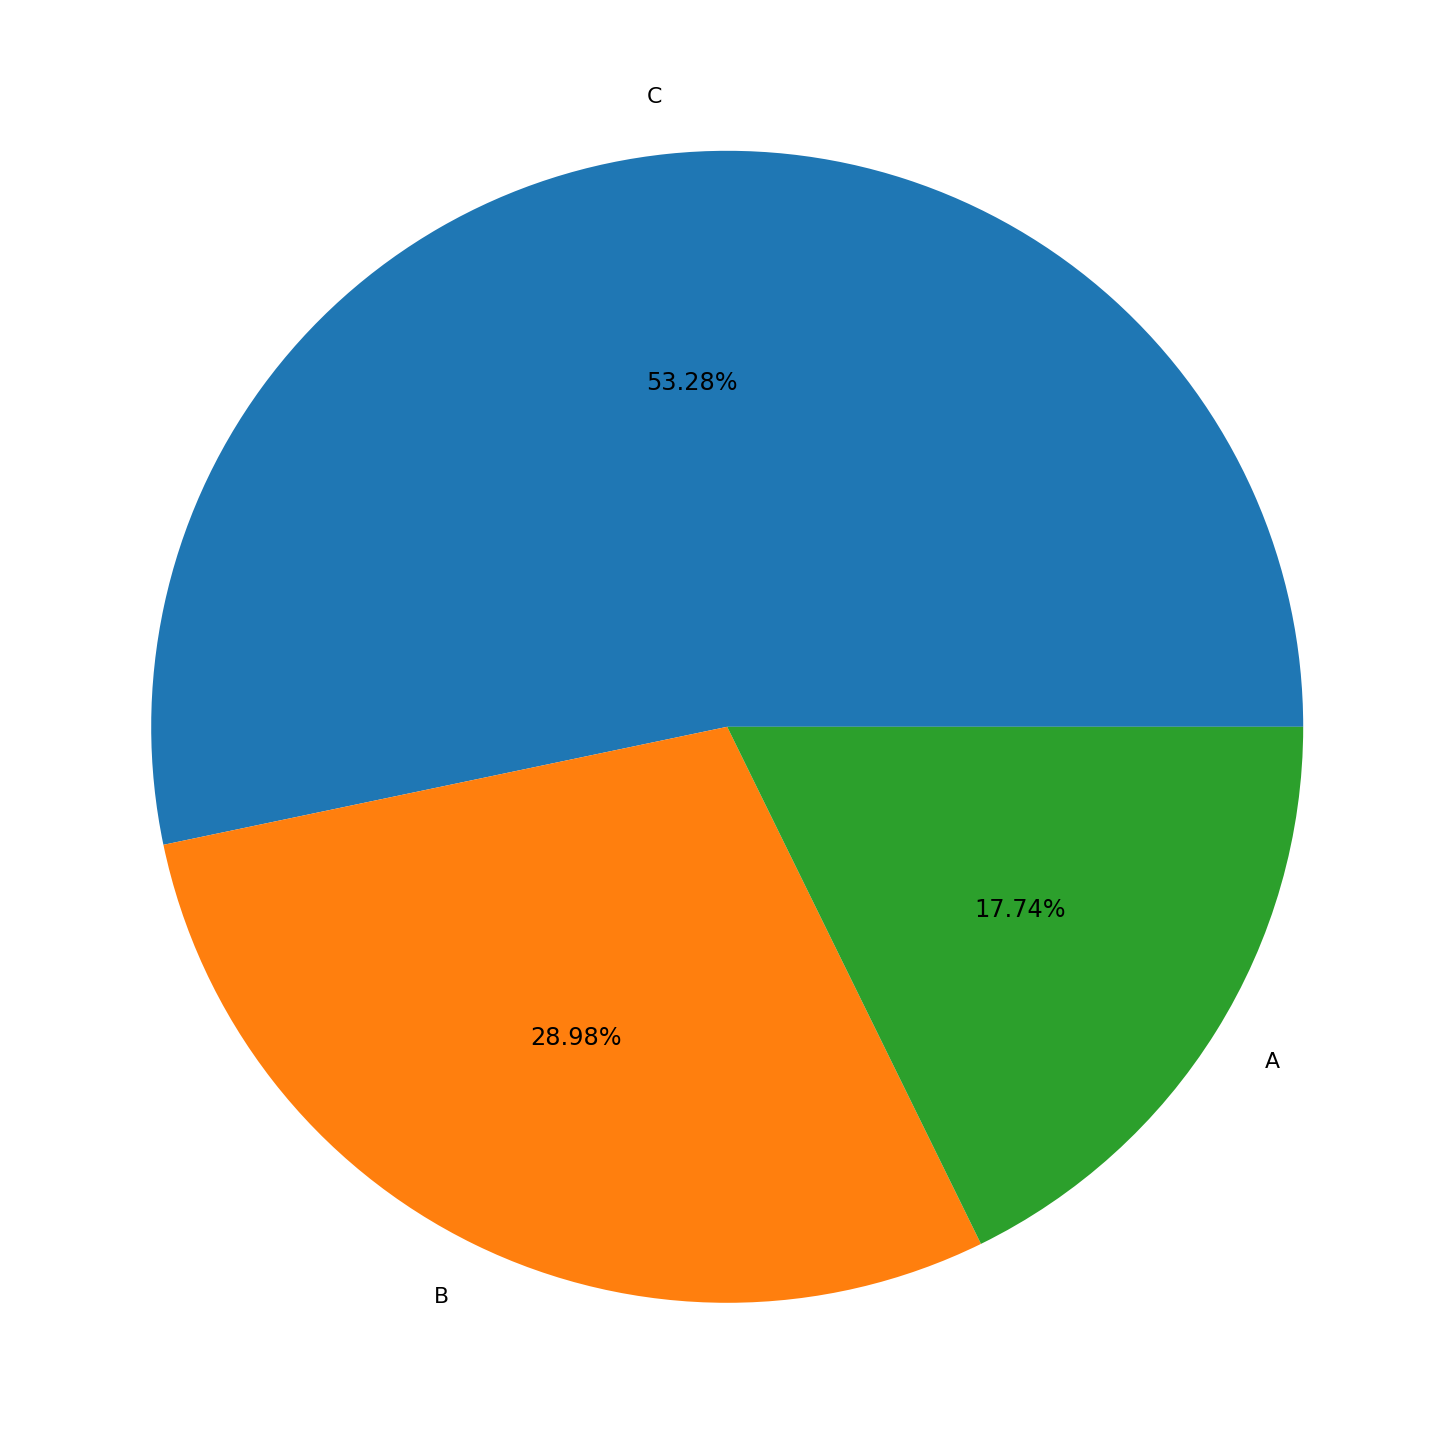

In [31]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['City_Category'].value_counts()), labels=list(users_data['City_Category'].value_counts().index), autopct='%1.2f%%')
plt.show()

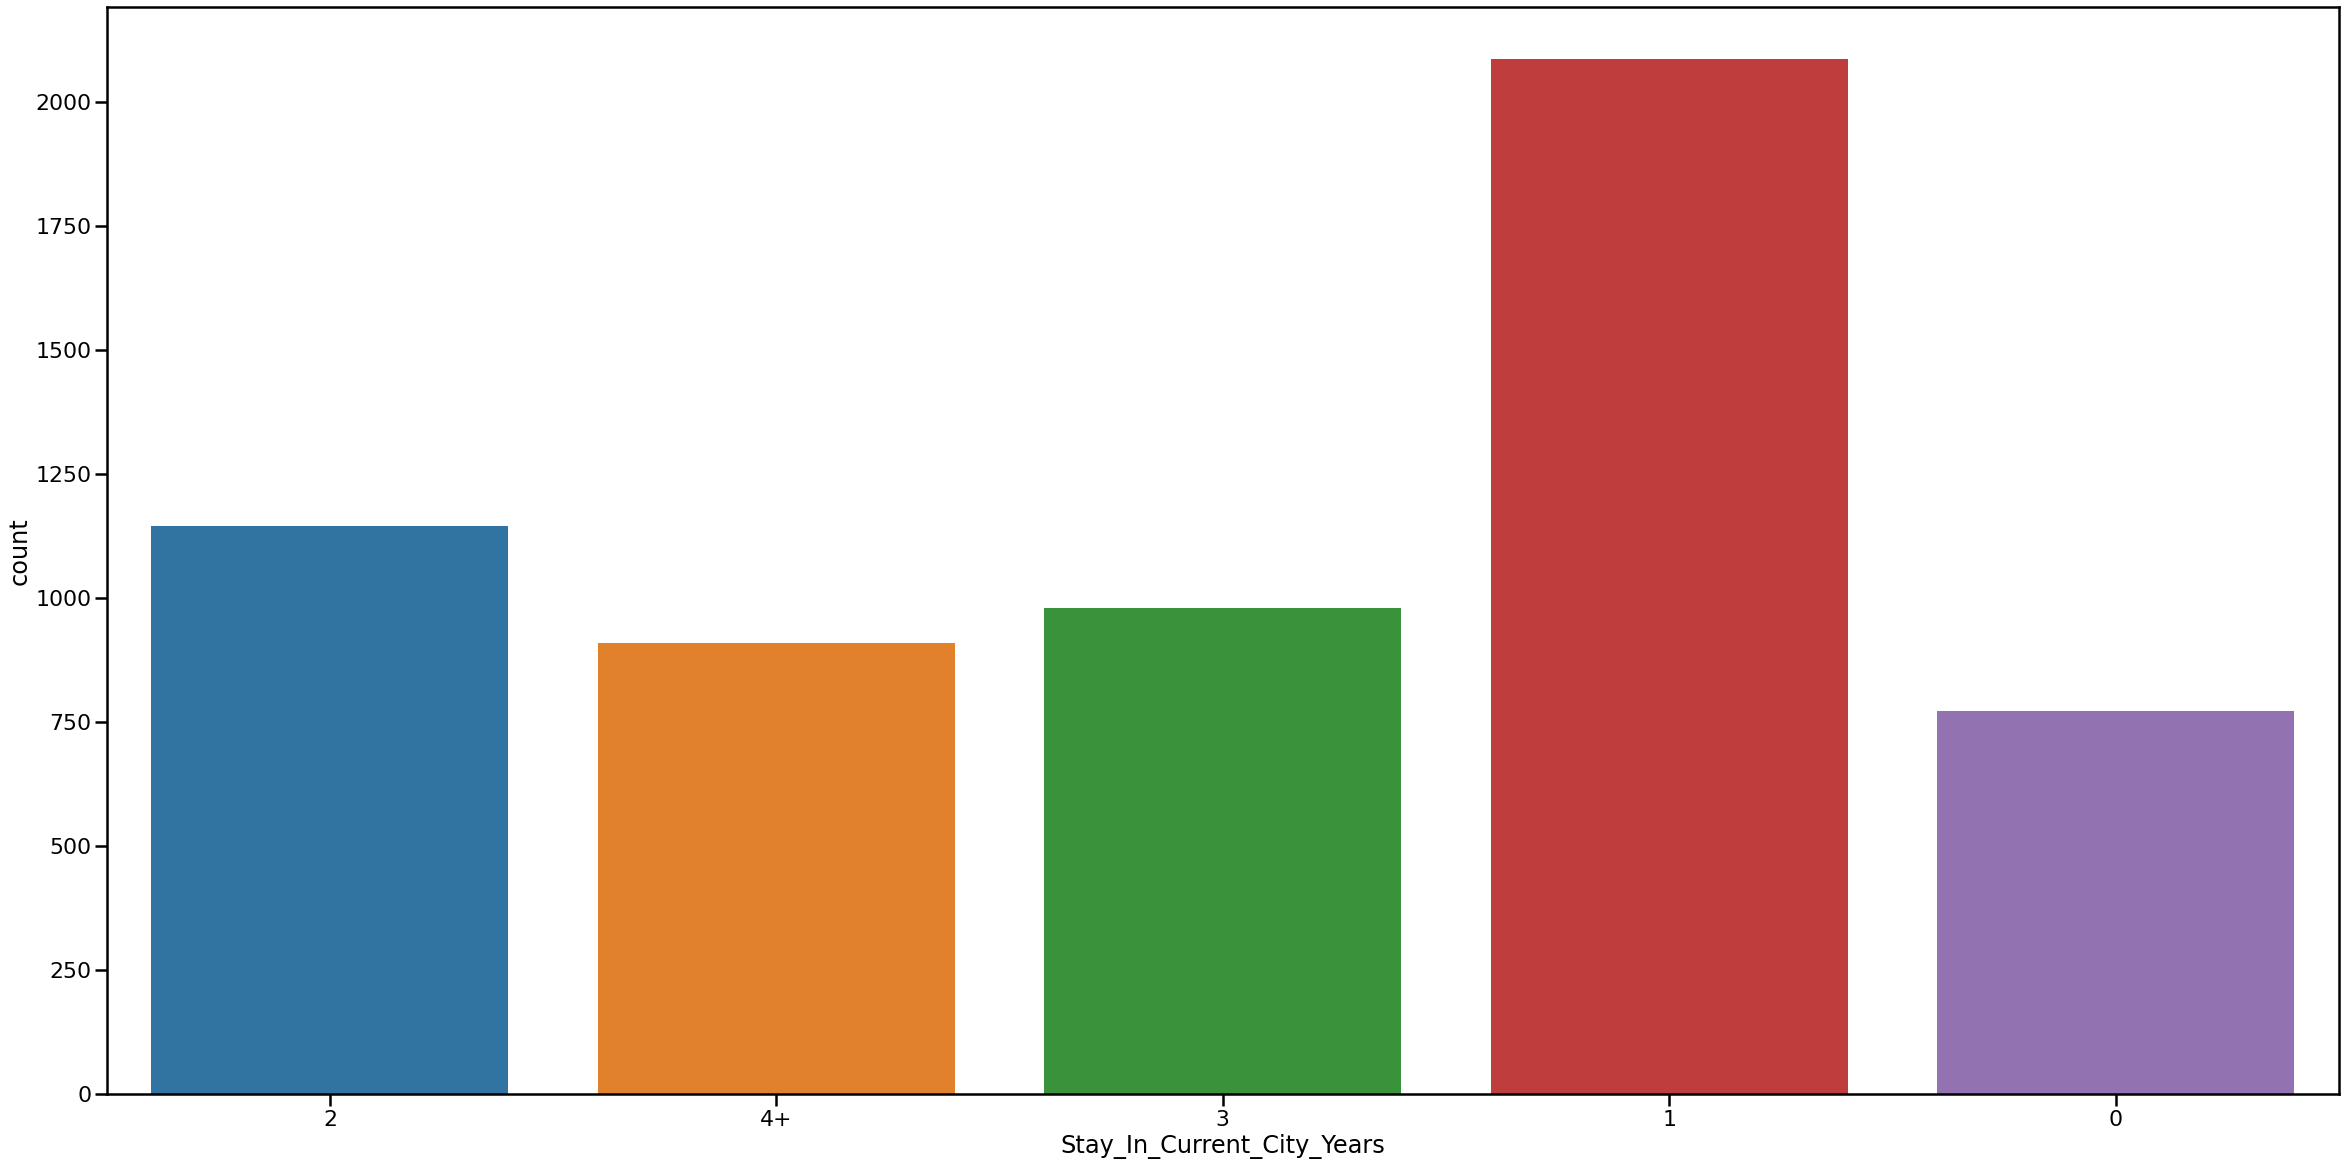

In [32]:
plt.figure(figsize=(40,20))
sns.countplot(x='Stay_In_Current_City_Years',data=users_data)
plt.show()

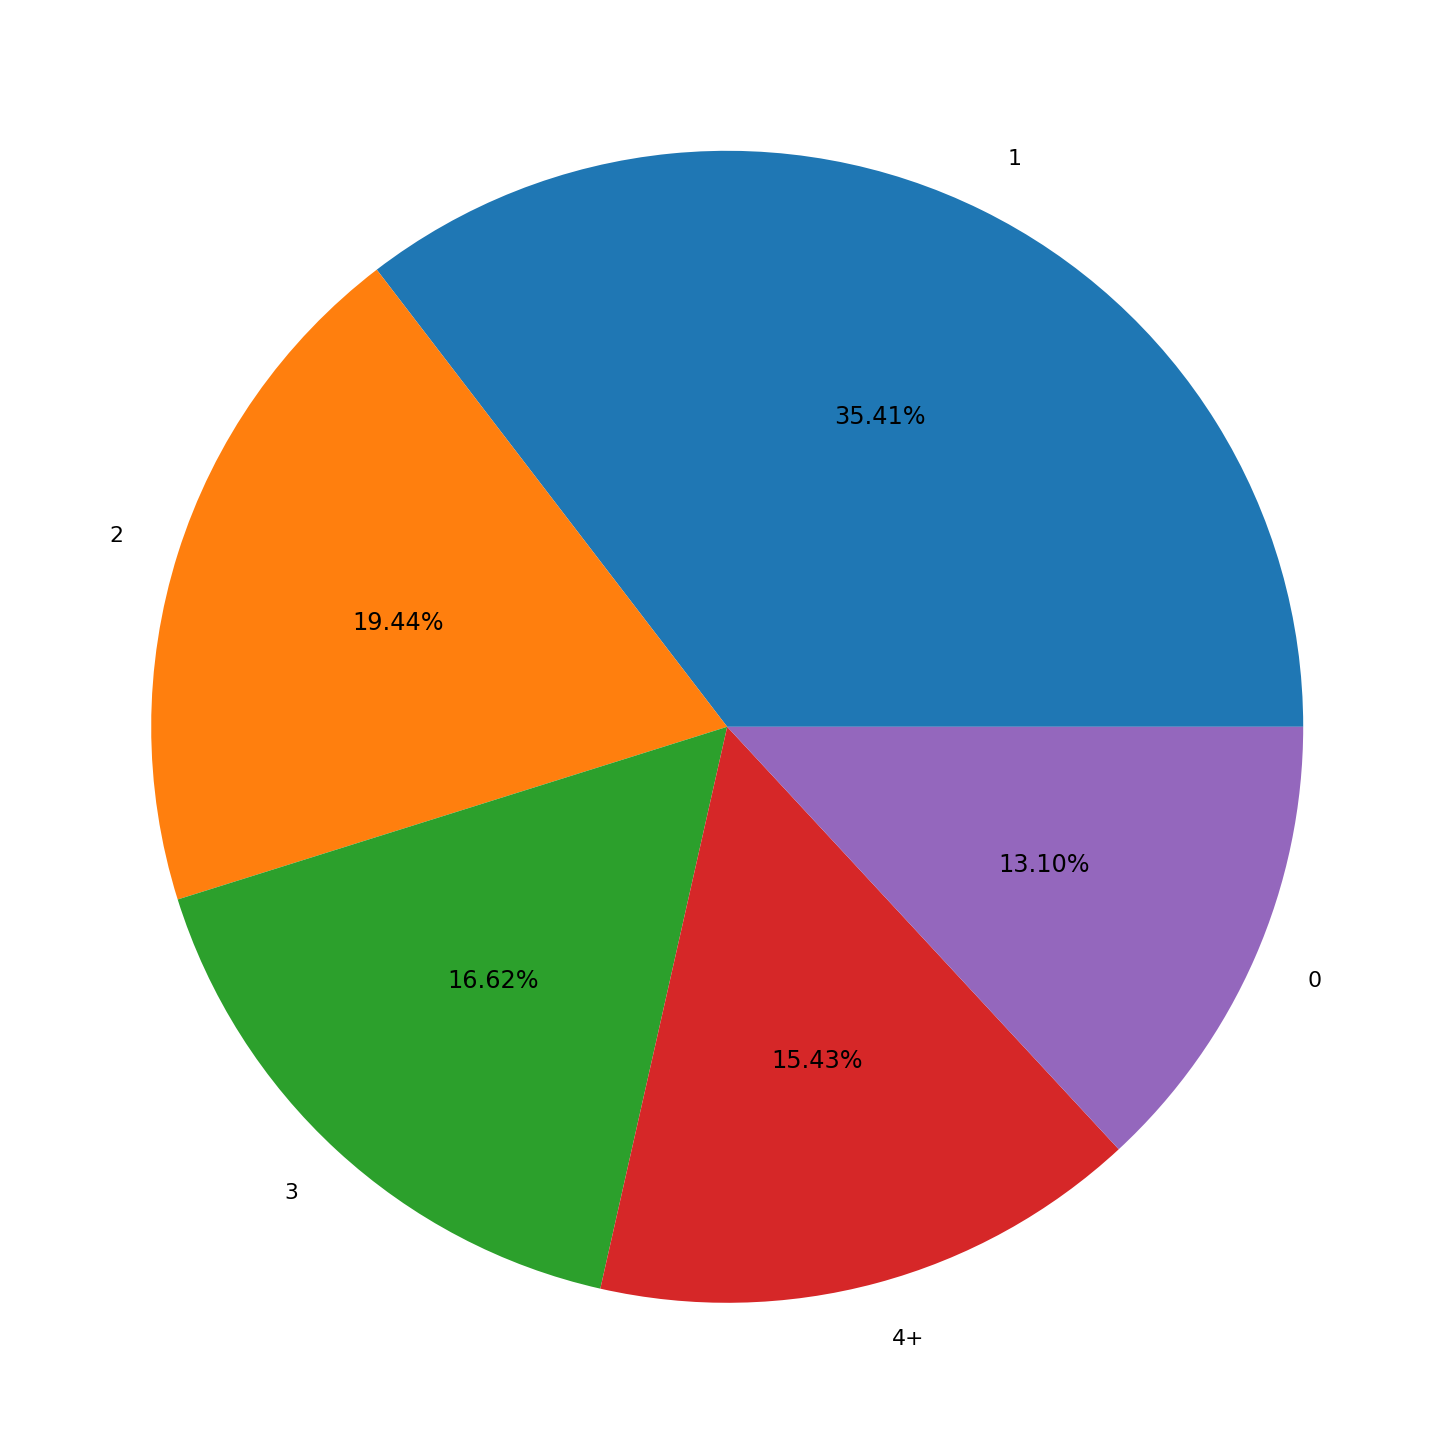

In [33]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['Stay_In_Current_City_Years'].value_counts()), labels=list(users_data['Stay_In_Current_City_Years'].value_counts().index), autopct='%1.2f%%')
plt.show()

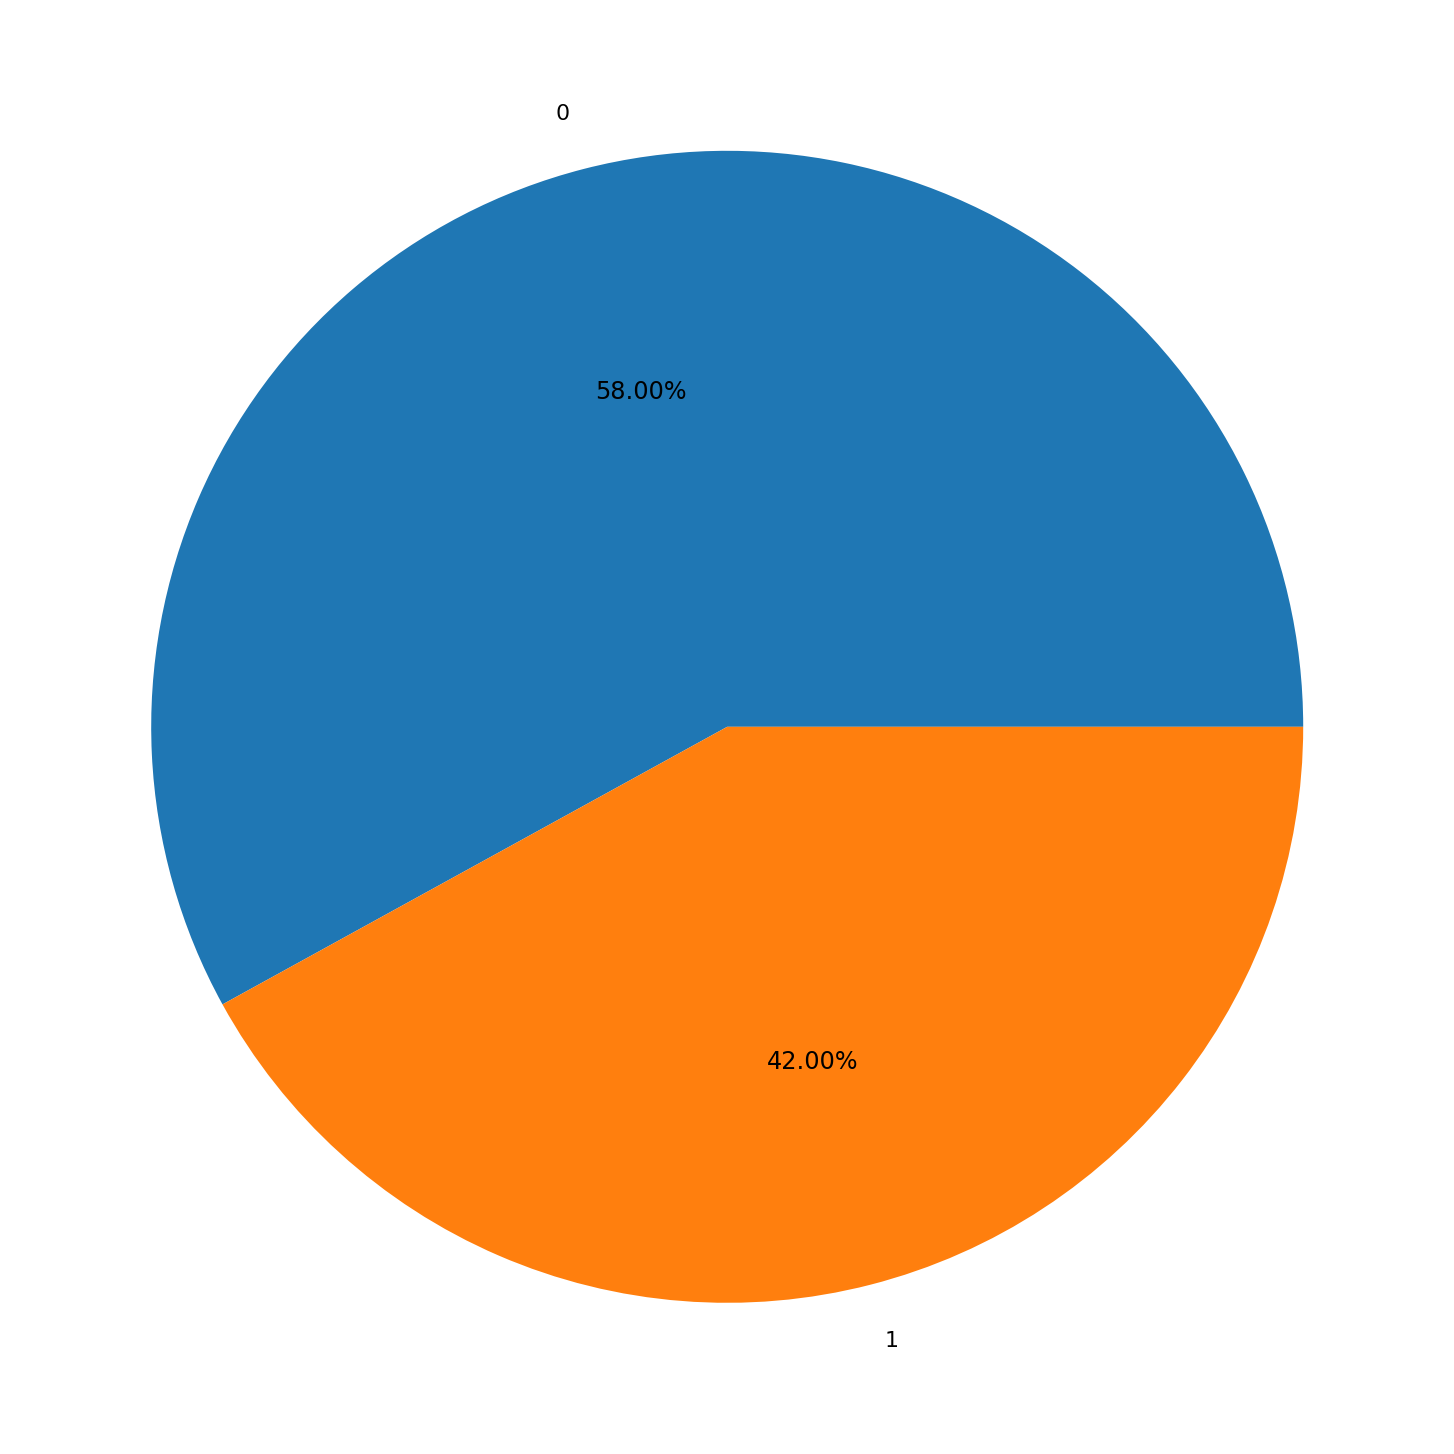

In [34]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['Marital_Status'].value_counts()), labels=list(users_data['Marital_Status'].value_counts().index), autopct='%1.2f%%')
plt.show()

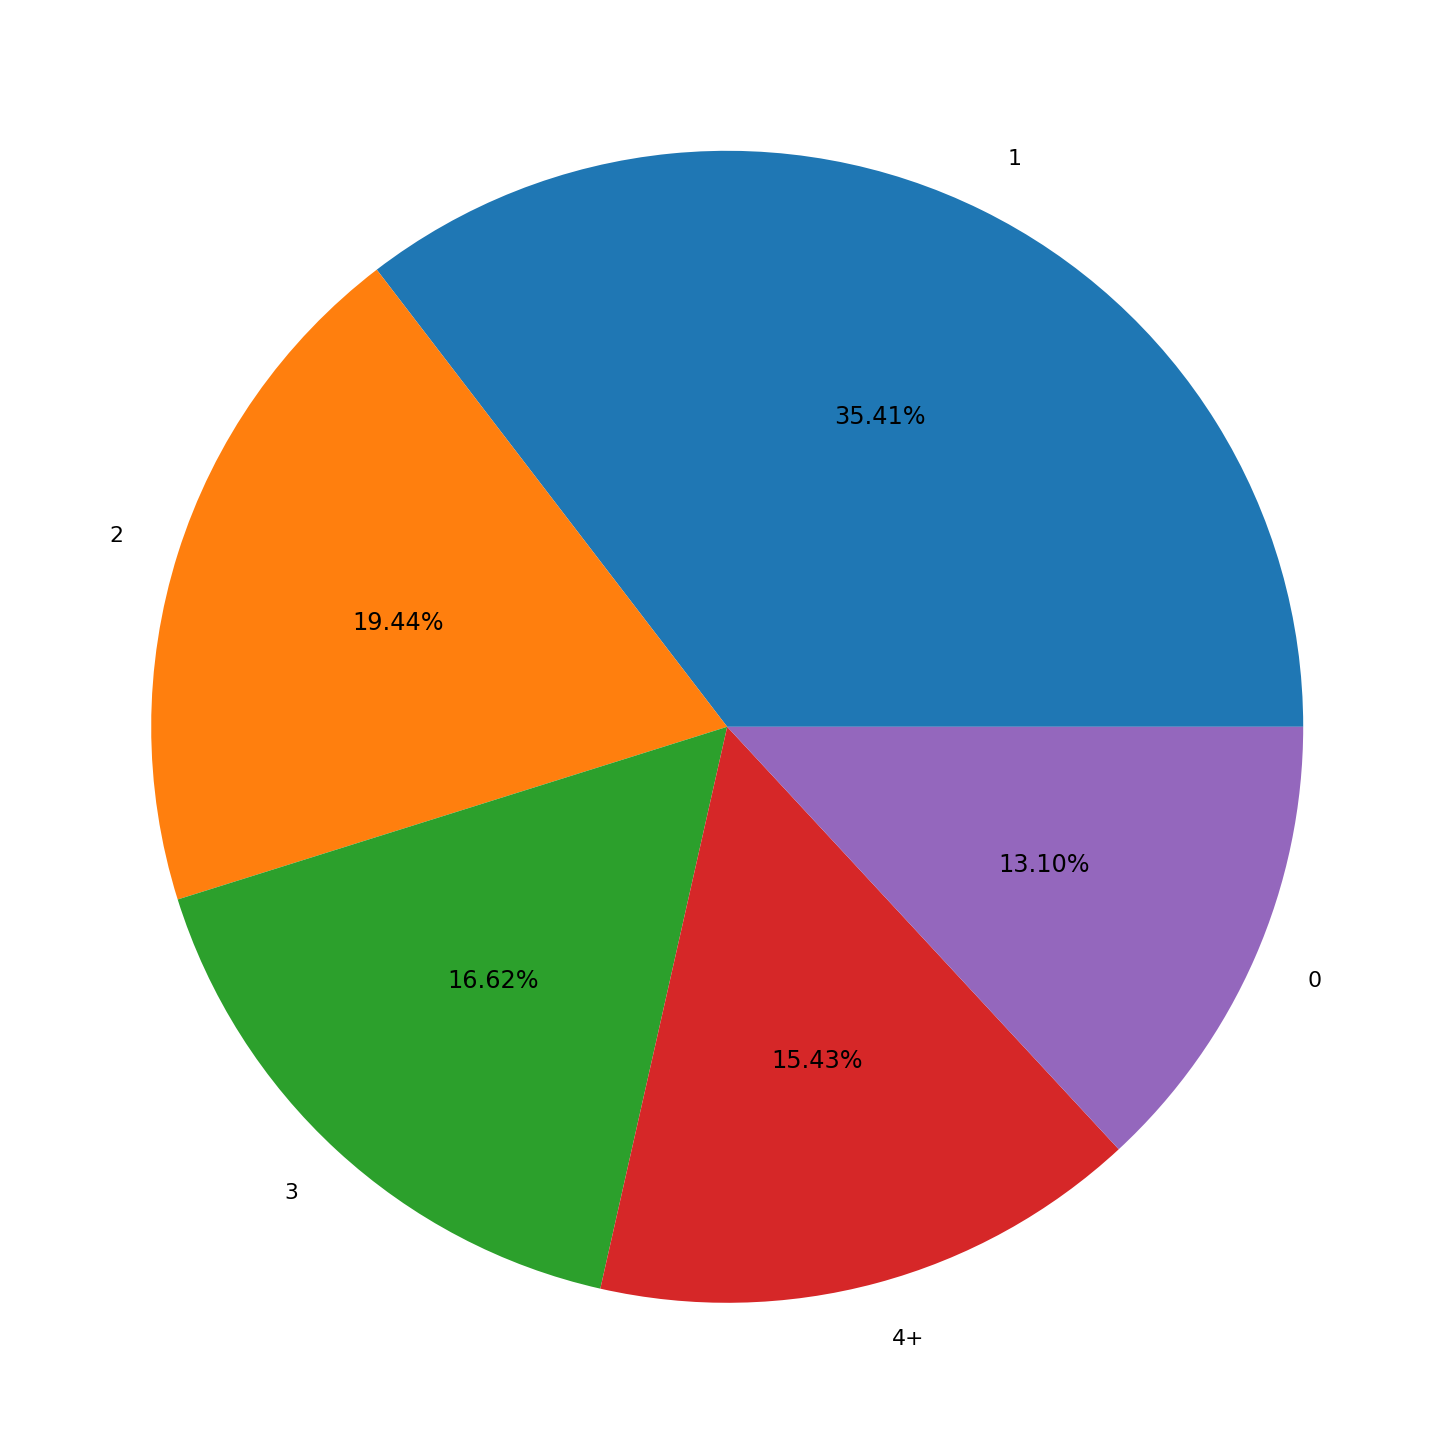

In [35]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,20))
ax=fig.add_axes([0,0,1,1])
ax.pie(list(users_data['Stay_In_Current_City_Years'].value_counts()), labels=list(users_data['Stay_In_Current_City_Years'].value_counts().index), autopct='%1.2f%%')
plt.show()

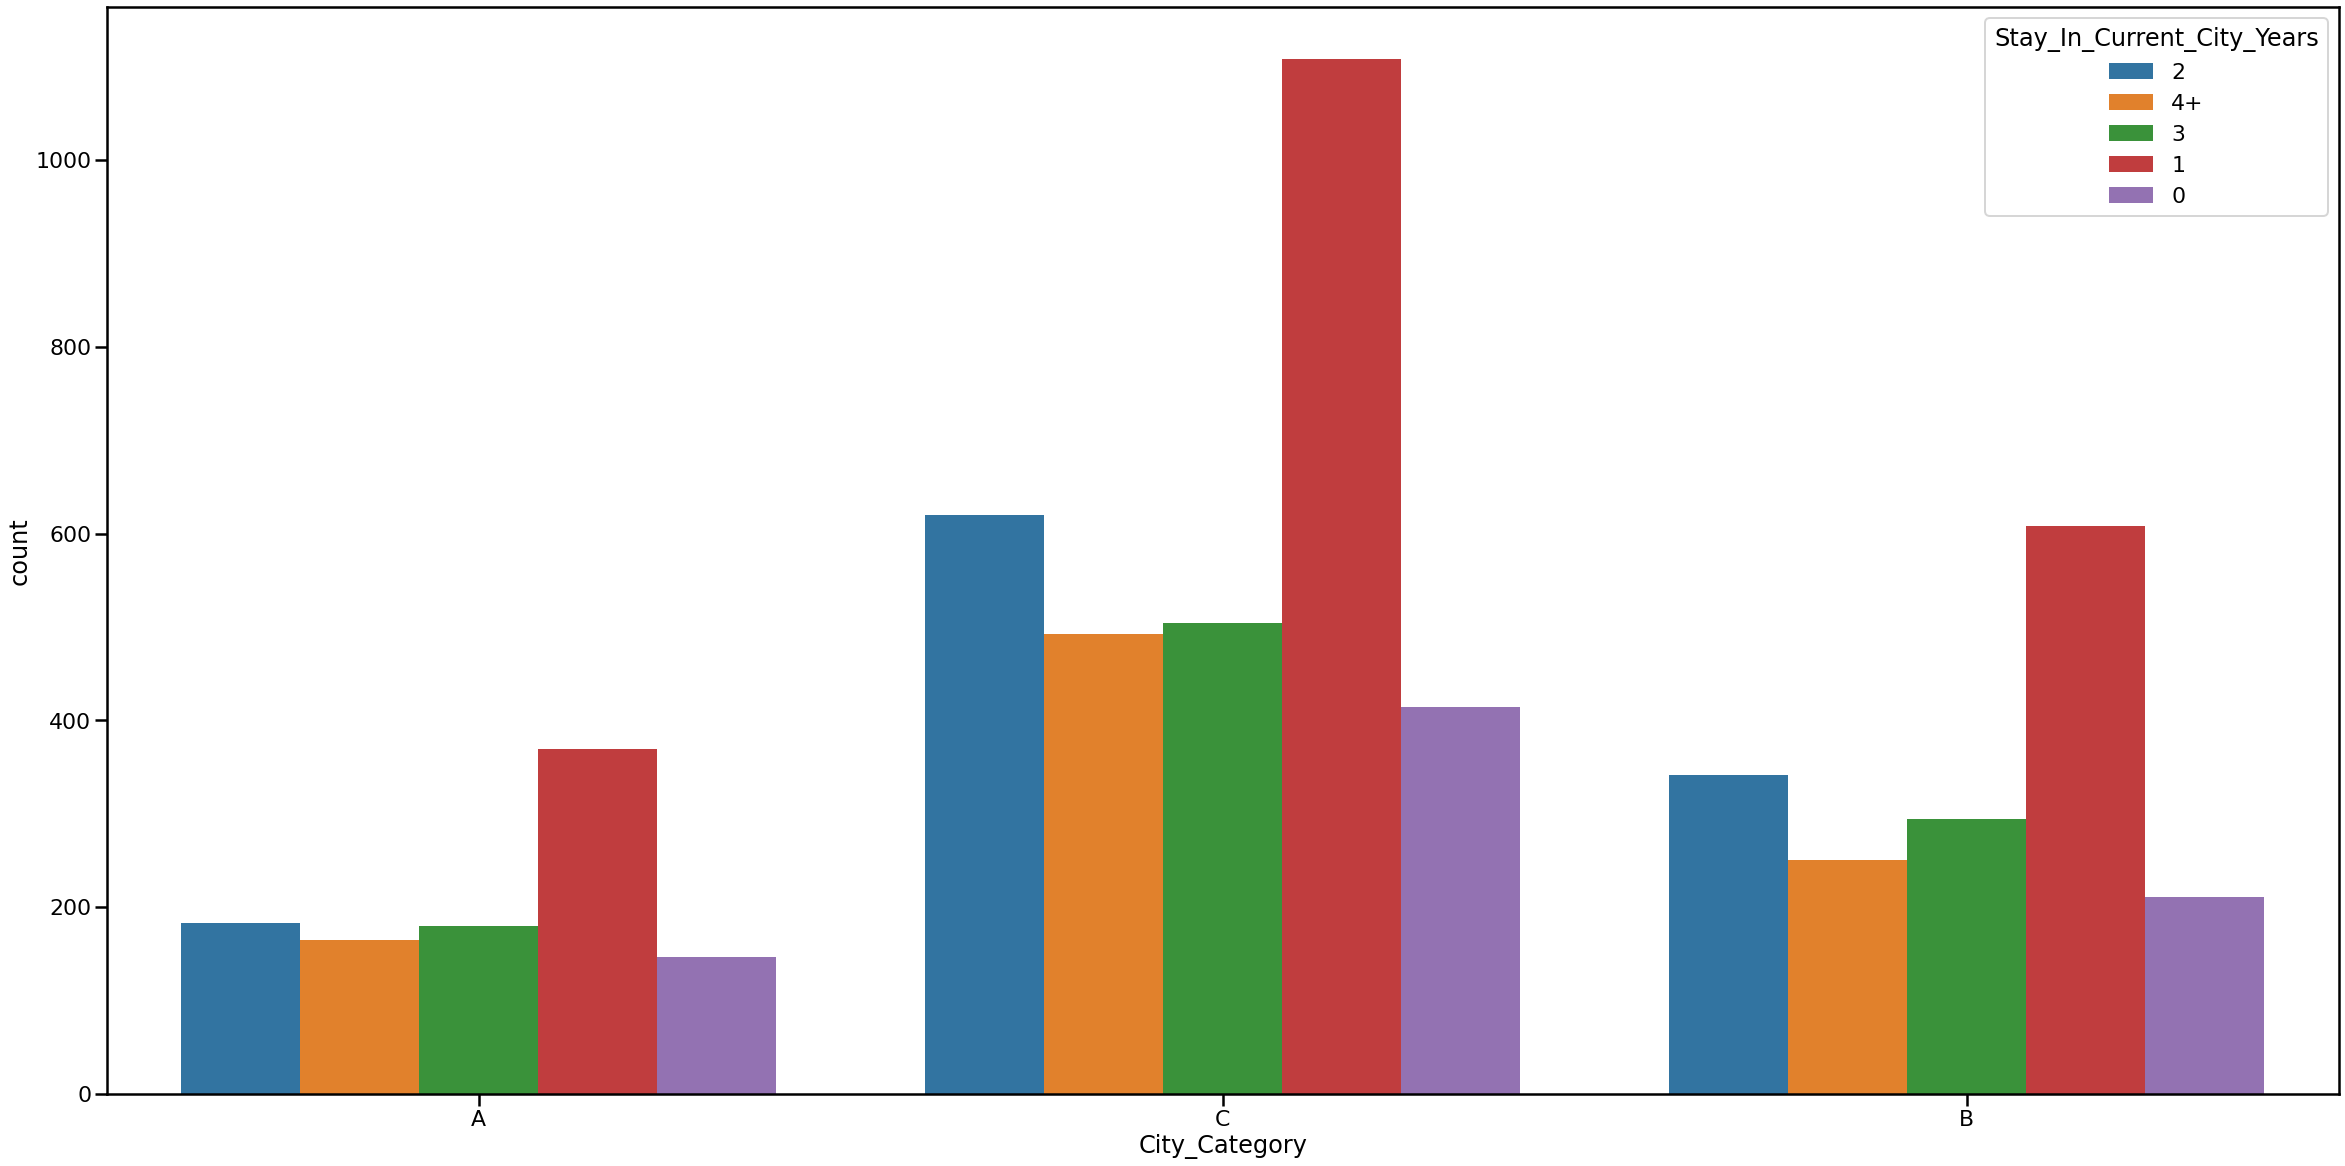

In [36]:
plt.figure(figsize=(40,20))
sns.countplot(x='City_Category', data=users_data,hue='Stay_In_Current_City_Years')
plt.show()

In [37]:

grouped_product=data_t.groupby('Product_ID')

In [38]:
data_t['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00352042       1
P00162742       1
P00160742       1
P00299742       1
P00107442       1
Name: Product_ID, Length: 3631, dtype: int64

In [39]:
grouped_product.get_group('P00069042')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
825,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715
3314,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037
4224,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009
5864,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346
...,...,...,...,...,...,...,...,...,...,...,...,...
539484,1005061,P00069042,F,18-25,19,C,2,1,3,NaN,NaN,13483
540849,1005284,P00069042,M,26-35,16,C,1,0,3,NaN,NaN,10895
543419,1005667,P00069042,M,36-45,7,B,1,1,3,NaN,NaN,11047
544454,1005812,P00069042,F,26-35,7,A,1,1,3,NaN,NaN,13557


In [40]:
pid=list(data_t['Product_ID'].unique())

In [41]:
pid.sort()

In [42]:
pid[:5]

['P00000142', 'P00000242', 'P00000342', 'P00000442', 'P00000542']

In [43]:
pid[3621:]

['P0098942',
 'P0099042',
 'P0099142',
 'P0099242',
 'P0099342',
 'P0099442',
 'P0099642',
 'P0099742',
 'P0099842',
 'P0099942']

In [44]:
p_mean=grouped_product['Purchase'].agg(np.mean)

In [45]:

p_mean

Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
                 ...     
P0099442     14351.915000
P0099642      6439.230769
P0099742      7872.603175
P0099842      7228.549020
P0099942      5572.785714
Name: Purchase, Length: 3631, dtype: float64

In [46]:
grouped_product.get_group('P0099842')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
9491,1001449,P0099842,M,36-45,20,A,1,1,5,12.0,14.0,7193
32062,1004916,P0099842,M,18-25,20,C,4+,0,5,12.0,14.0,7024
33140,1005085,P0099842,M,55+,17,C,0,0,5,12.0,14.0,7143
37046,1005704,P0099842,F,18-25,4,B,3,0,5,12.0,14.0,6988
39675,1000097,P0099842,F,36-45,3,C,3,0,5,12.0,14.0,7012
...,...,...,...,...,...,...,...,...,...,...,...,...
525709,1003025,P0099842,F,36-45,0,C,1,0,5,12.0,14.0,8877
536315,1004531,P0099842,M,18-25,4,C,2,0,5,12.0,14.0,8797
537198,1004675,P0099842,F,18-25,4,A,2,0,5,12.0,14.0,8664
538439,1004888,P0099842,F,55+,0,B,4+,0,5,12.0,14.0,8877


In [47]:
k=pd.DataFrame(columns=data_t.columns)

In [48]:

for i in range(len(pid)):
    k=pd.concat([k,grouped_product.get_group(pid[i]).head(1)])

In [49]:

k.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
293,1000049,P00000142,M,18-25,12,C,4+,1,3,4.0,5.0,13353
11232,1001694,P00000242,M,26-35,12,B,3,1,2,4.0,9.0,10129
2950,1000476,P00000342,M,36-45,0,B,0,0,5,14.0,NaN,5201
3347,1000543,P00000442,M,26-35,5,B,4+,1,5,8.0,NaN,5178
2292,1000352,P00000542,M,18-25,4,A,0,0,5,NaN,NaN,5211


In [50]:
k.shape

(3631, 12)

In [51]:

k=k.drop(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'],axis=1)

In [52]:
product_data=k

In [53]:
p_mean

Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
                 ...     
P0099442     14351.915000
P0099642      6439.230769
P0099742      7872.603175
P0099842      7228.549020
P0099942      5572.785714
Name: Purchase, Length: 3631, dtype: float64

In [54]:
product_data['Mean_Price']=p_mean.values

In [55]:
product_data.head(10)

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Mean_Price
293,P00000142,3,4.0,5.0,13353,11143.642361
11232,P00000242,2,4.0,9.0,10129,10551.851064
2950,P00000342,5,14.0,NaN,5201,5313.422131
3347,P00000442,5,8.0,NaN,5178,4795.358696
2292,P00000542,5,NaN,NaN,5211,5417.530201
116,P00000642,1,6.0,16.0,12015,14913.238281
7736,P00000742,5,14.0,NaN,7075,6031.390041
6790,P00000842,2,4.0,NaN,10028,10008.722222
6217,P00000942,1,NaN,NaN,4123,10565.909091
1650,P00001042,1,2.0,16.0,11376,13762.186879


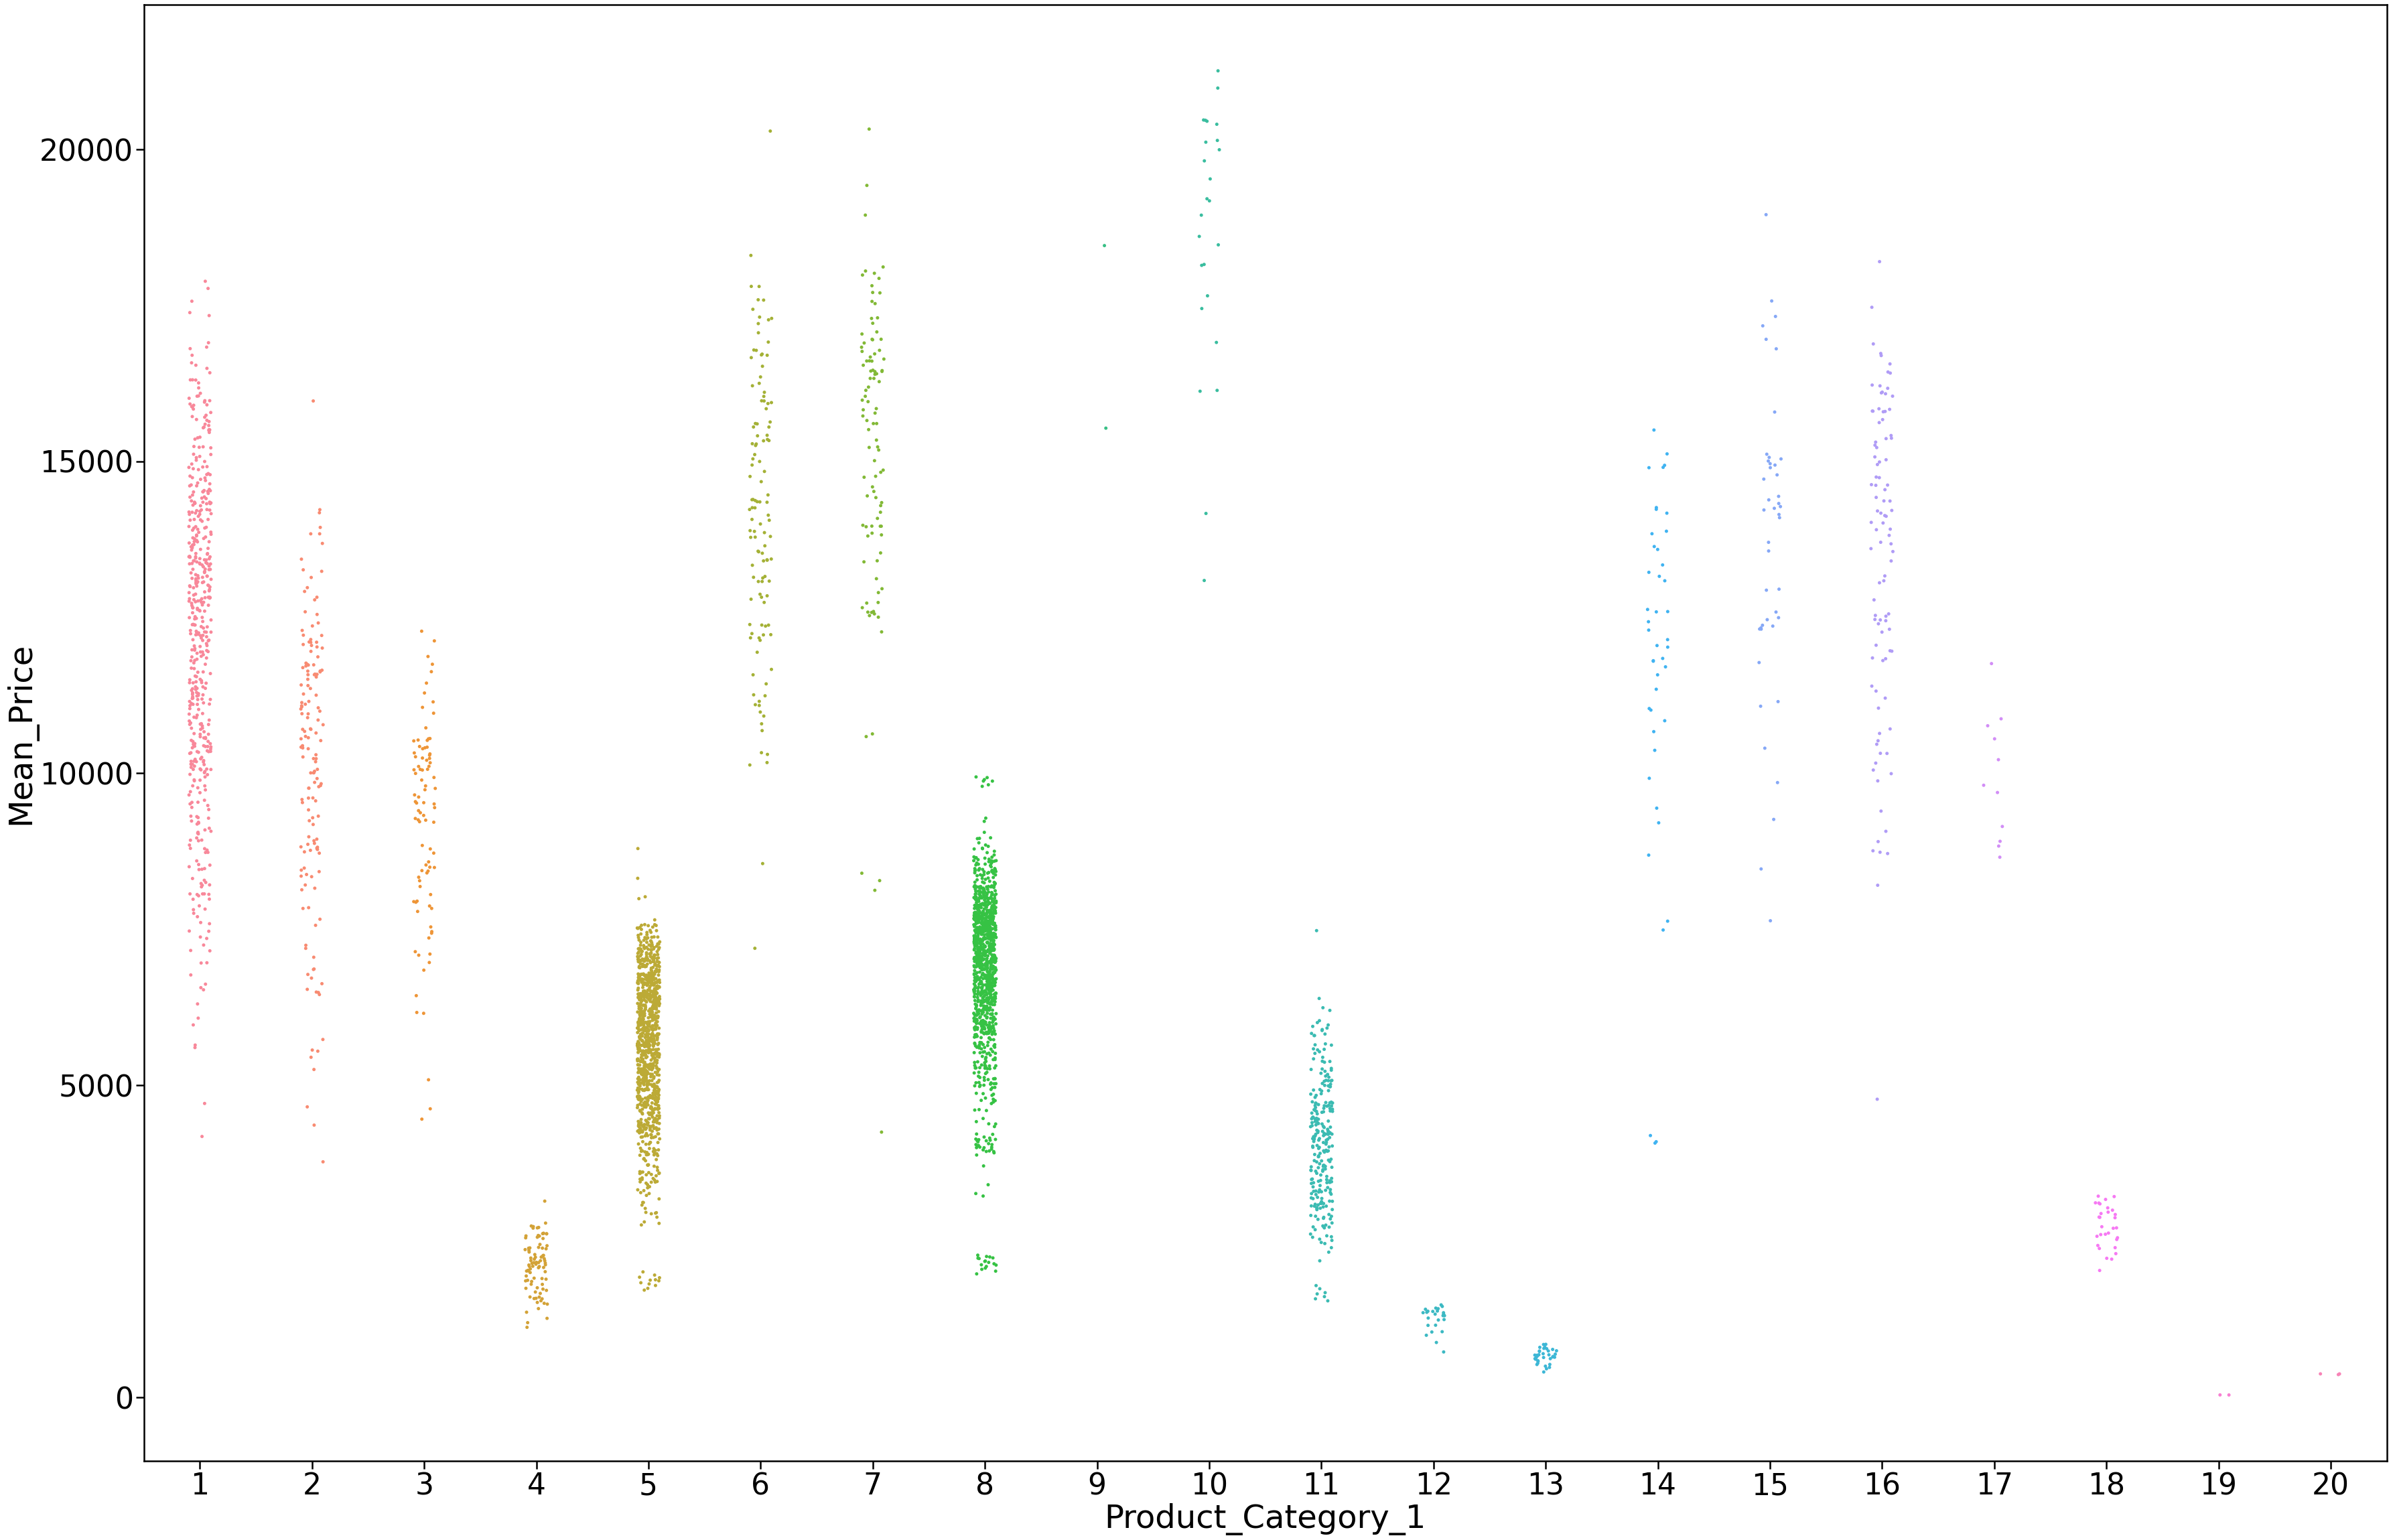

In [56]:

plt.figure(figsize=(60,40))
sns.axes_style(
               {'xtick.major.size':1.5},{'ytick.major.size':1.5})
sns.set_context('poster', font_scale=2.0)
sns.stripplot(x='Product_Category_1',y='Mean_Price', data=product_data)
plt.show()

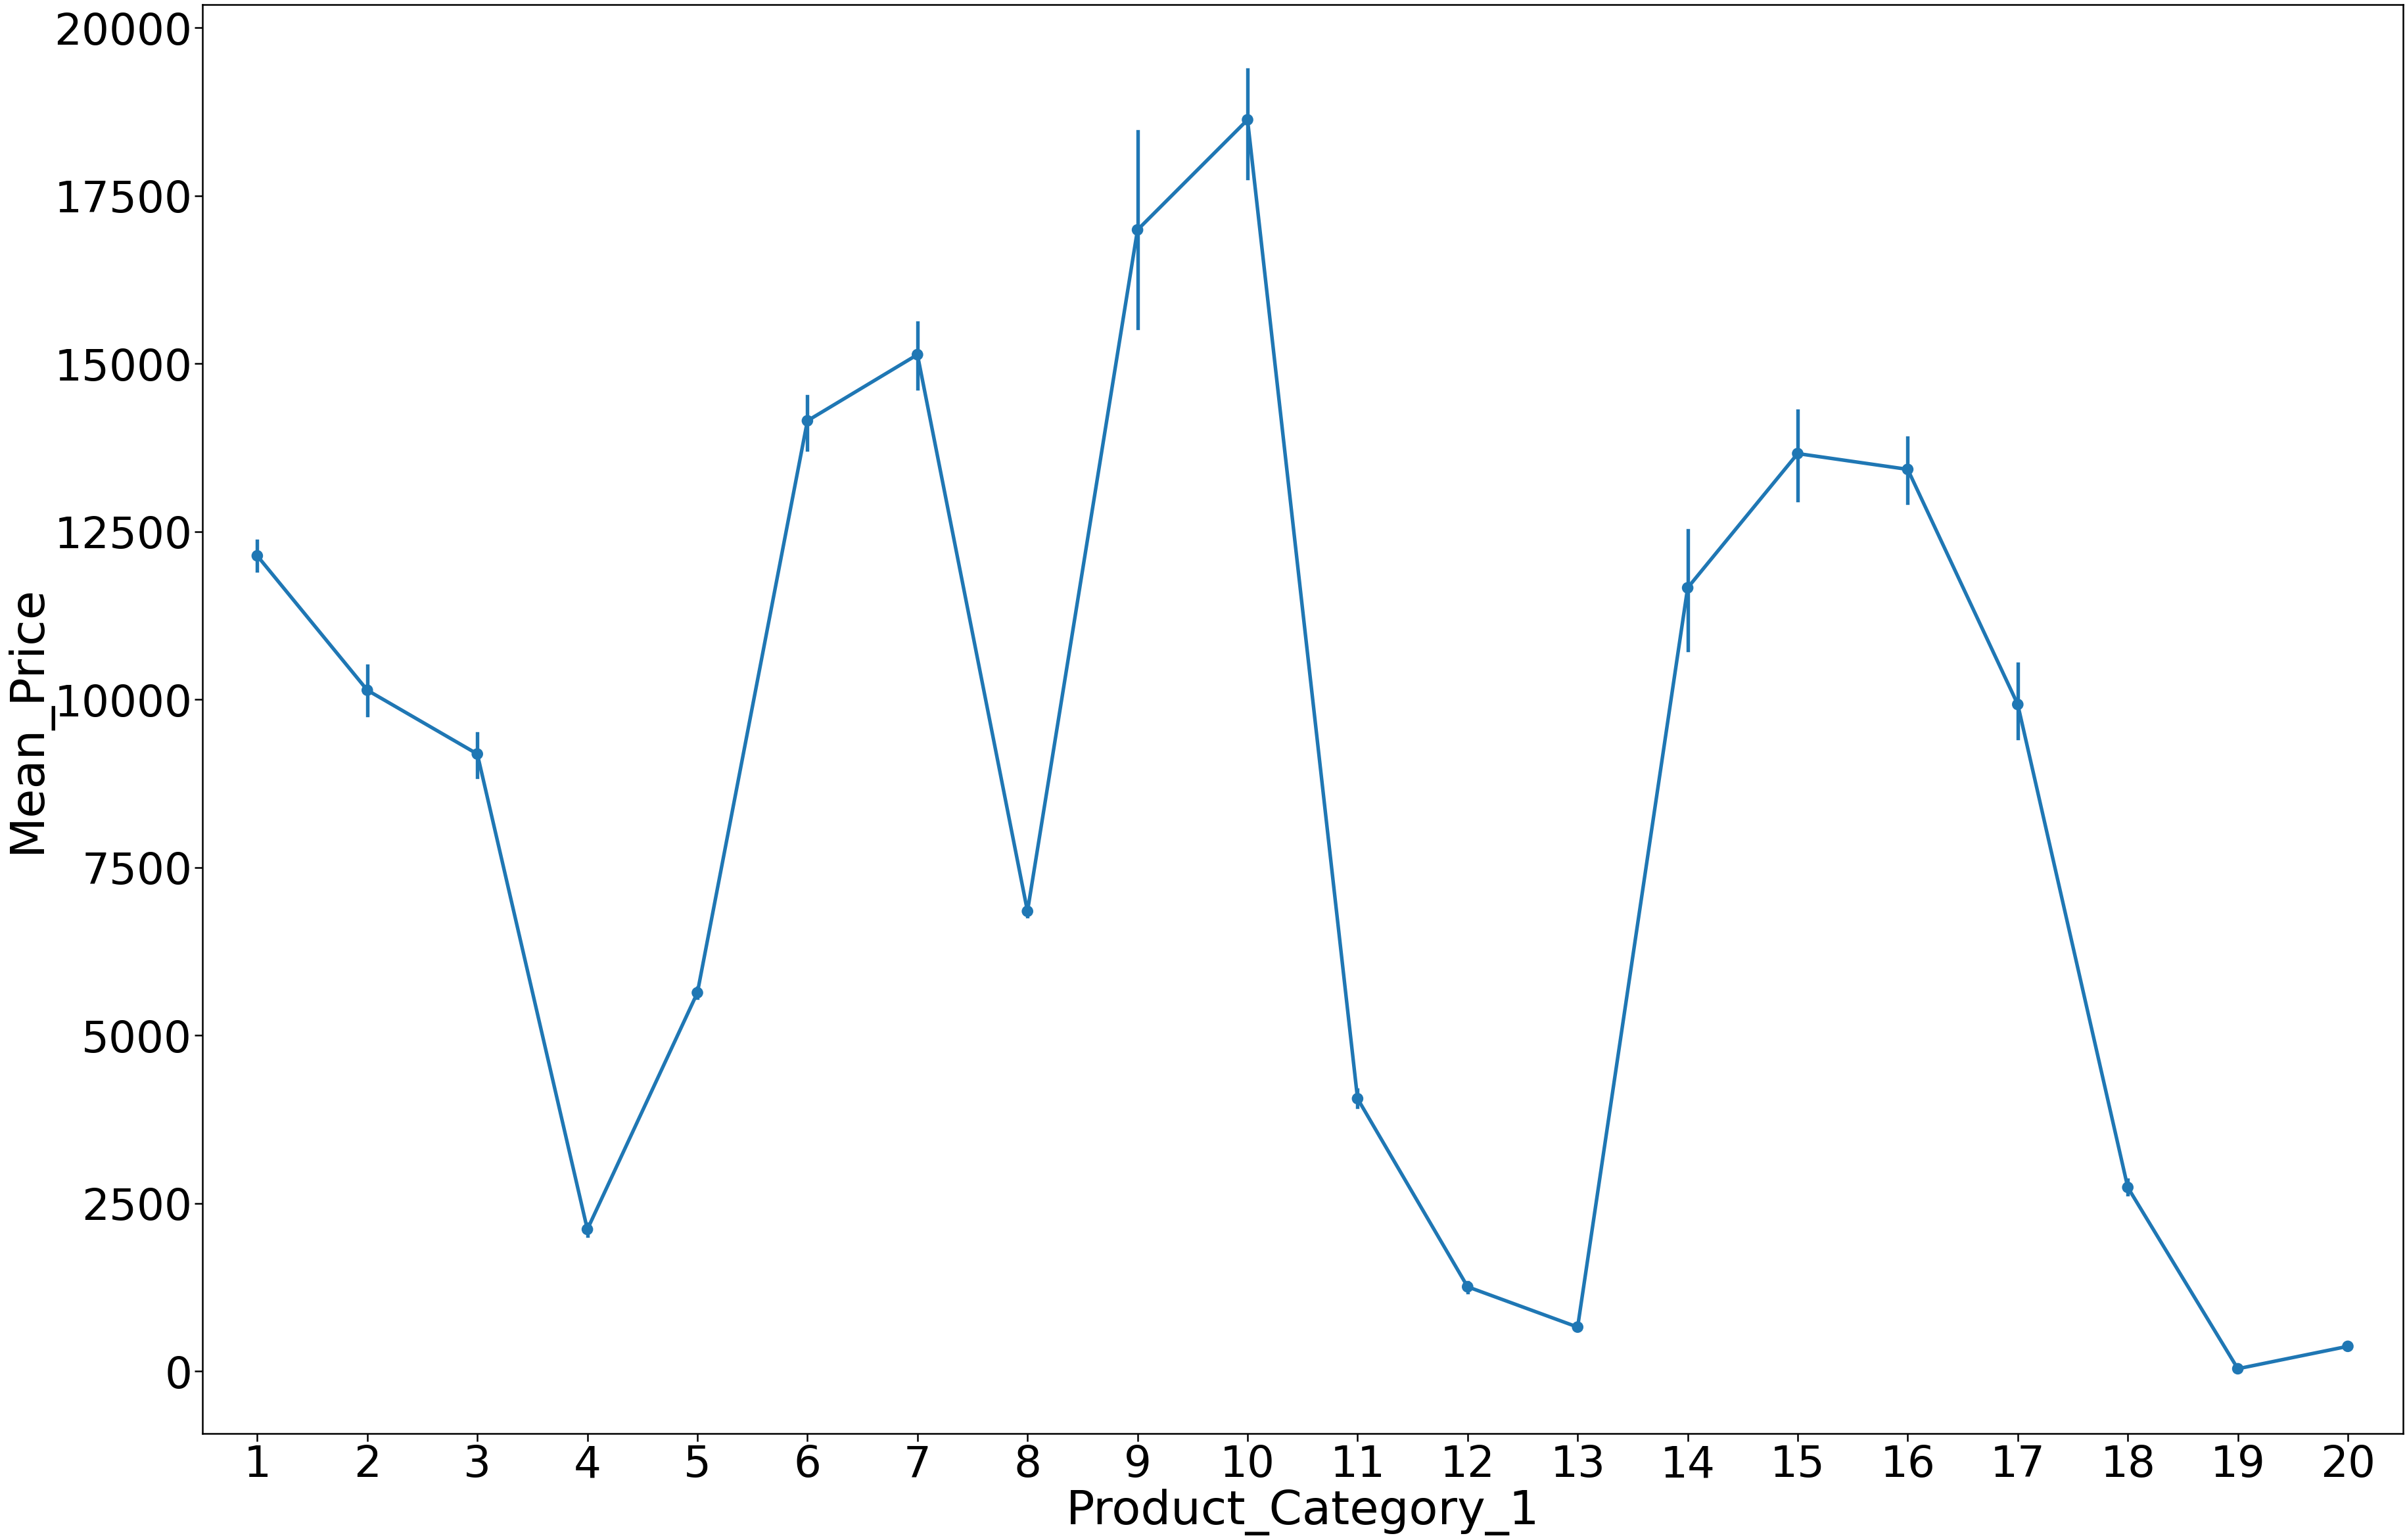

In [57]:
plt.figure(figsize=(60,40))
sns.axes_style(
               {'xtick.major.size':3.5},{'ytick.major.size':1.5})
sns.set_context('poster',font_scale=3.0)
sns.pointplot(x='Product_Category_1',y='Mean_Price', data=product_data)
plt.show()

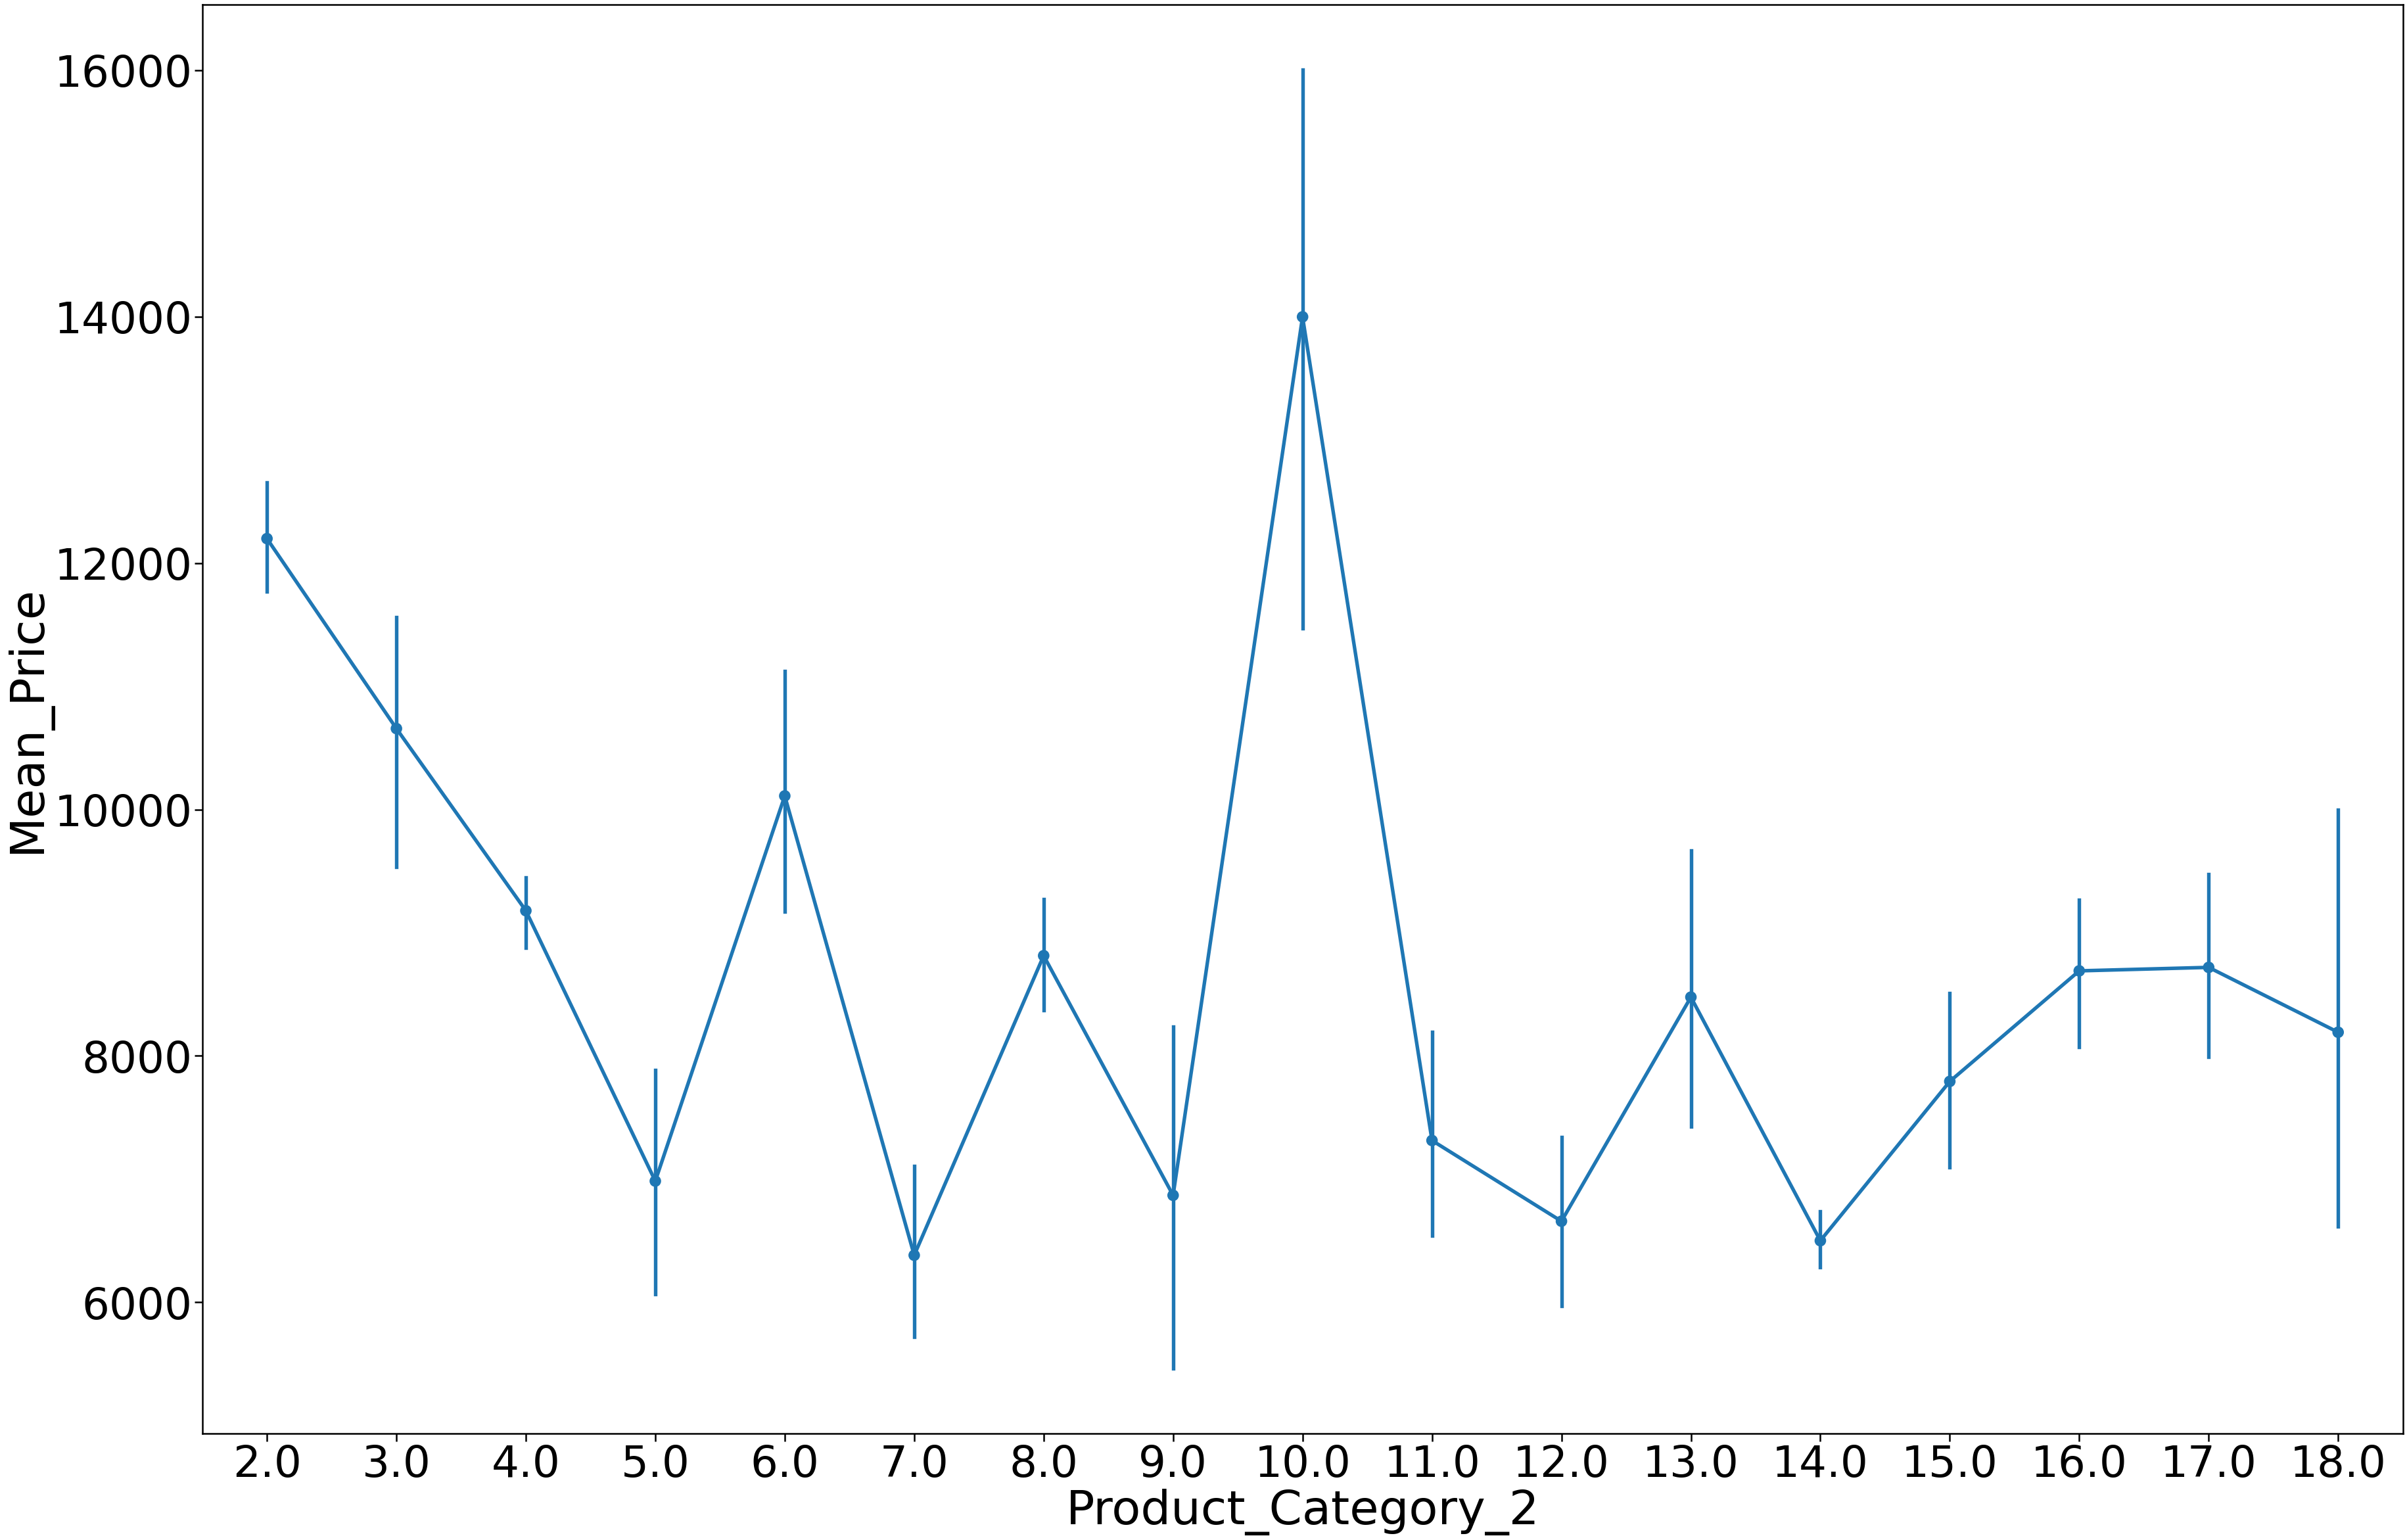

In [58]:
plt.figure(figsize=(60,40))
sns.axes_style(
               {'xtick.major.size':3.5},{'ytick.major.size':1.5})
sns.set_context('poster',font_scale=3.0)
sns.pointplot(x='Product_Category_2',y='Mean_Price', data=product_data)
plt.show()

In [59]:
product_data.head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Mean_Price
293,P00000142,3,4.0,5.0,13353,11143.642361
11232,P00000242,2,4.0,9.0,10129,10551.851064
2950,P00000342,5,14.0,NaN,5201,5313.422131
3347,P00000442,5,8.0,NaN,5178,4795.358696
2292,P00000542,5,NaN,NaN,5211,5417.530201


In [60]:
category_grouped=product_data.groupby('Product_Category_1')
category_grouped_2=product_data.groupby('Product_Category_2')
category_grouped_3=product_data.groupby('Product_Category_3')
category_grouped_mean=category_grouped['Mean_Price'].agg(np.mean)
category_grouped_mean_2=category_grouped_2['Mean_Price'].agg(np.mean)
category_grouped_mean_3=category_grouped_3['Mean_Price'].agg(np.mean)

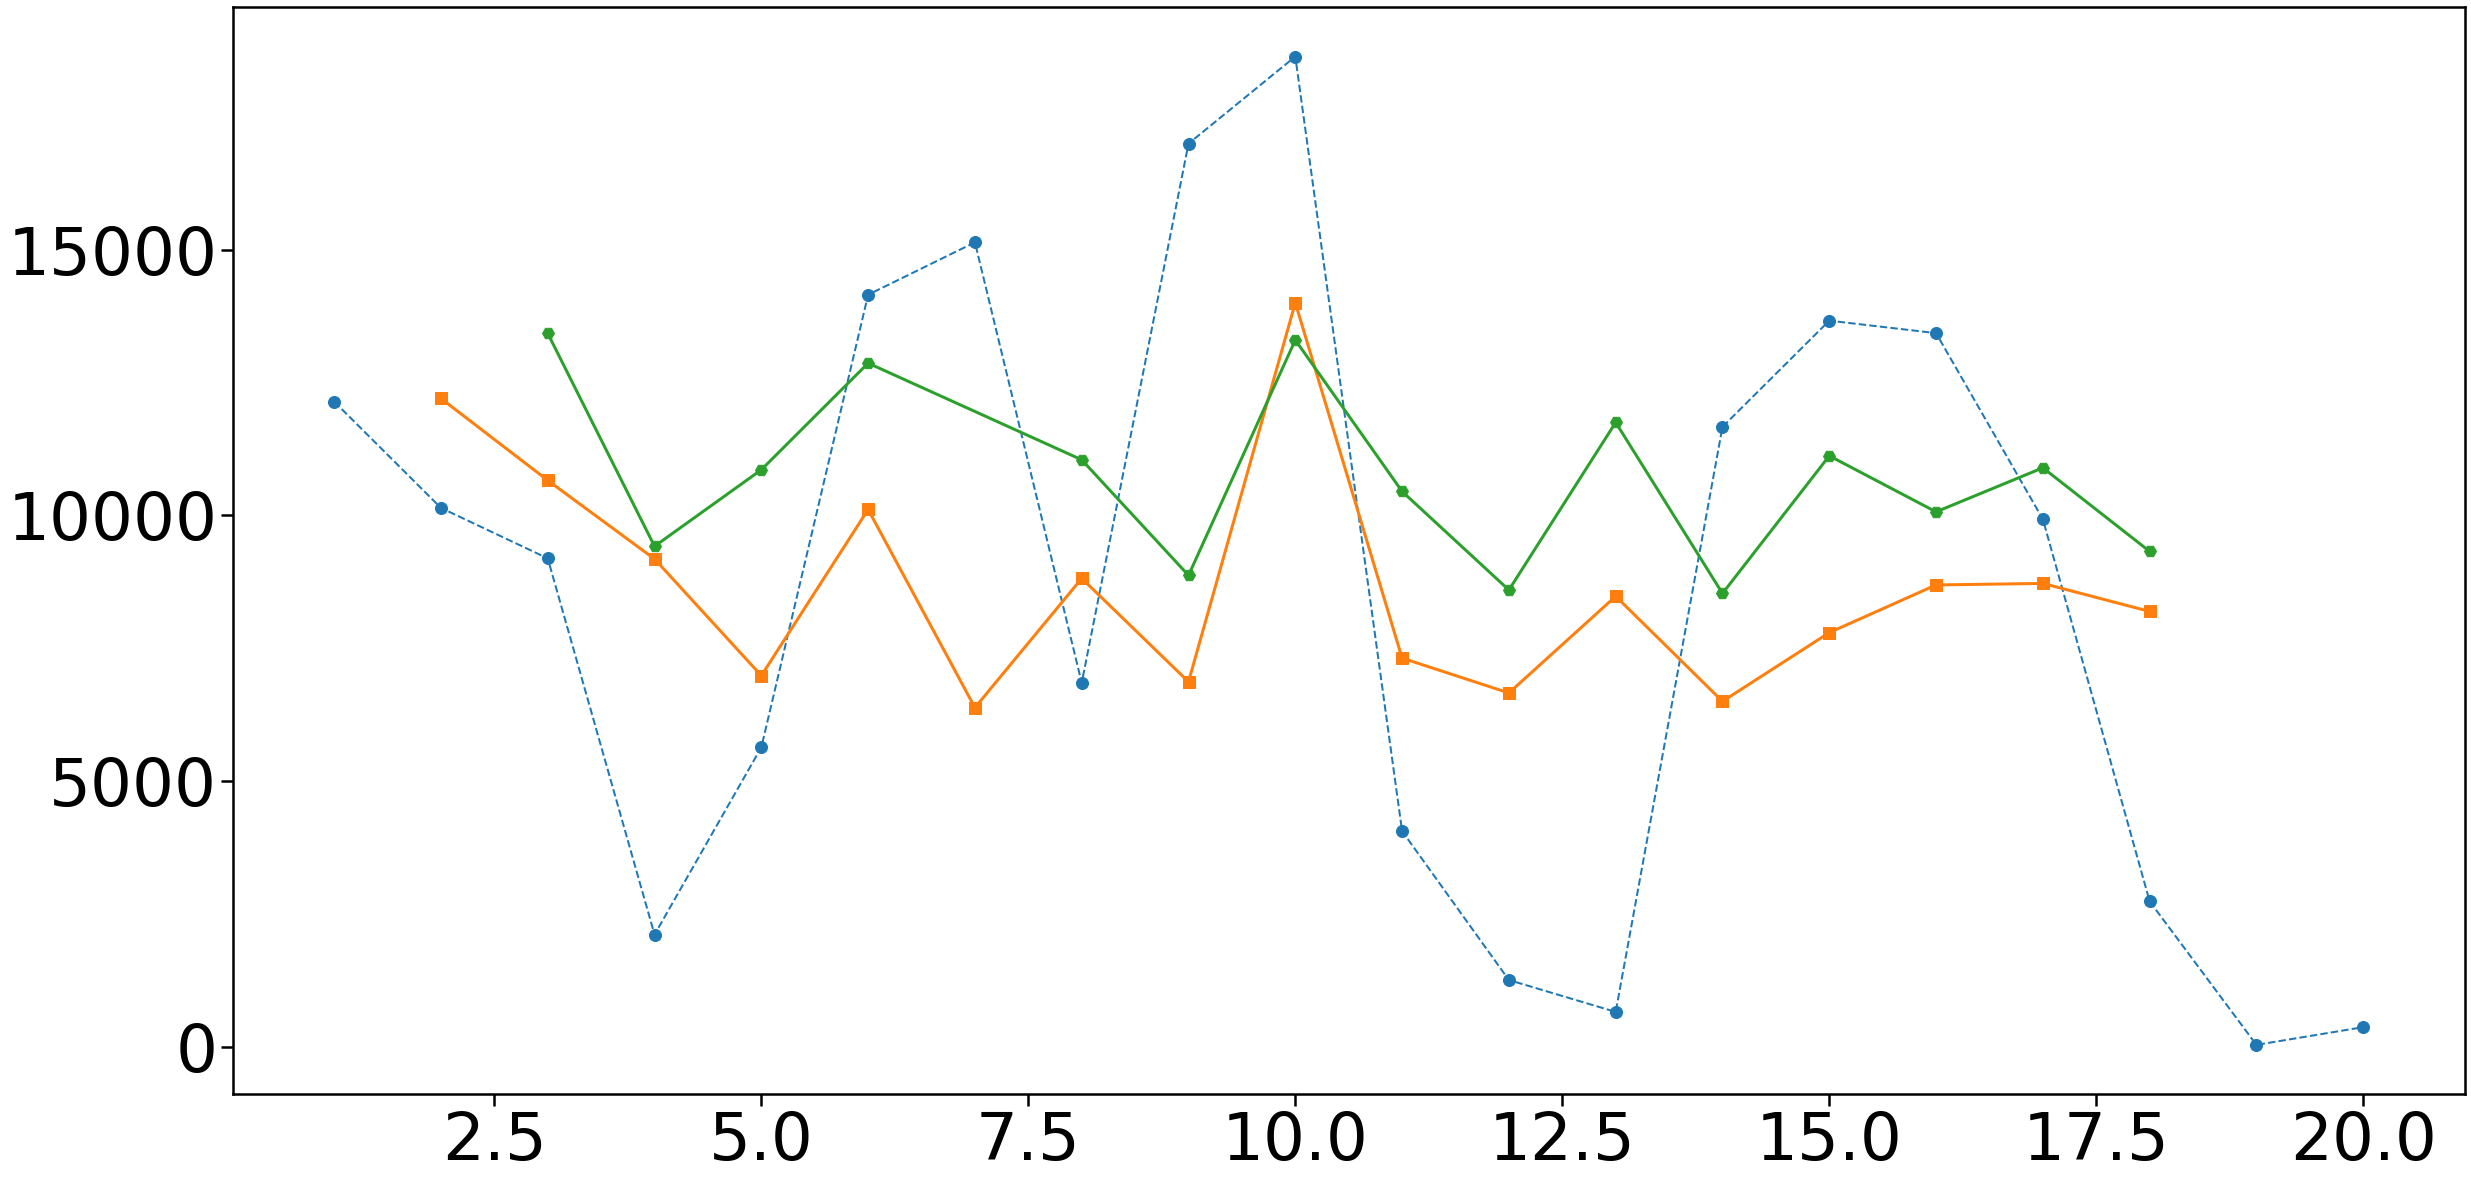

In [61]:
plt.figure(figsize=(40,20))
plt.plot(category_grouped_mean.index,category_grouped_mean.values,
         marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(category_grouped_mean_2.index,category_grouped_mean_2.values,
        marker='s',markersize=12)
plt.plot(category_grouped_mean_3.index,category_grouped_mean_3.values,
        marker='H', markersize=12)

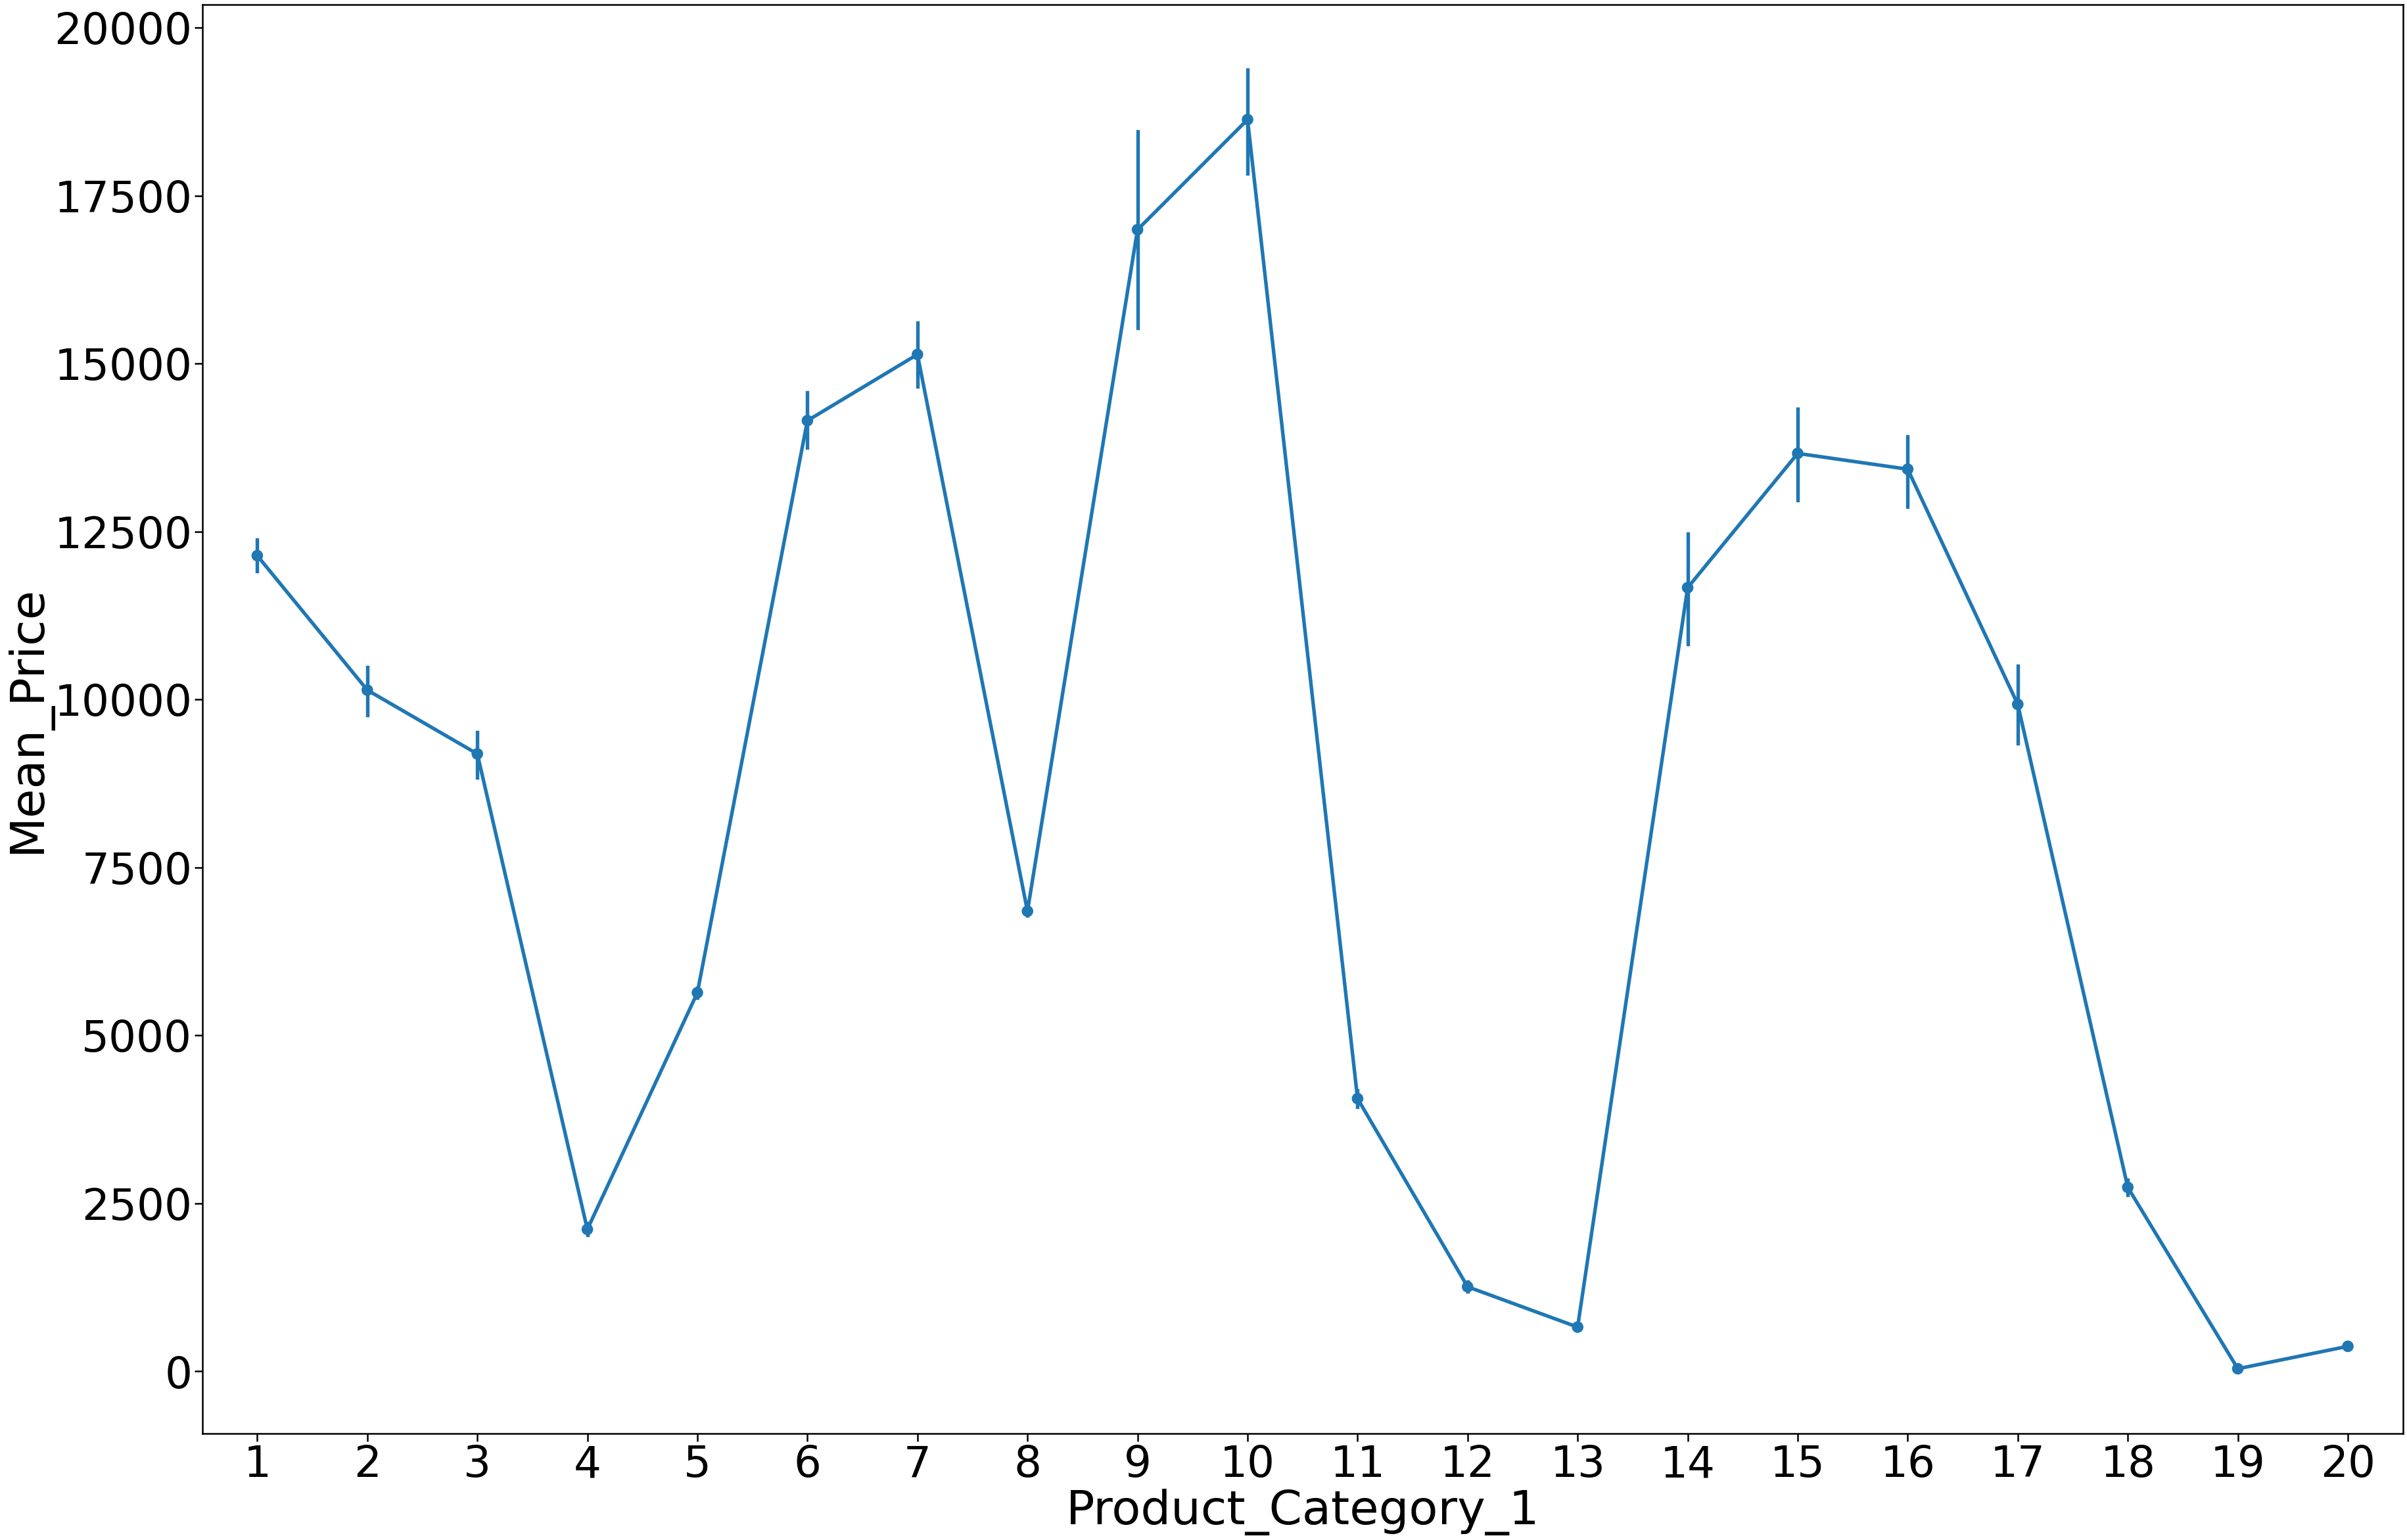

In [62]:
plt.figure(figsize=(60,40))
sns.axes_style(
               {'xtick.major.size':3.5},{'ytick.major.size':1.5})
sns.set_context('poster',font_scale=3.0)
sns.pointplot(x='Product_Category_1',y='Mean_Price', data=product_data)
plt.show()